# This is an example file which loads input data and plots it for you

## 1. Load some useful library for analysis

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## 2. Load the data

In [13]:
df = pd.read_csv('data.csv').set_index('Date')
df.head()

Asset      Signal1     Signal2     Signal3     Signal4  \
Date                                                                       
2000-01-03  4258.481700  4237.827494  393.780879 -337.933192  659.763906   
2000-01-04  4260.246443  4222.822224  378.585650 -364.449284  648.940384   
2000-01-05  4262.254628  4213.824762  389.955615 -391.594831  641.329710   
2000-01-06  4289.405332  4239.016108  406.660516 -333.249594  683.822313   
2000-01-07  4293.746629  4232.818801  403.366787 -320.479903  682.553985   

               Signal5      Signal6     Signal7     Signal8  
Date                                                         
2000-01-03 -752.865453  1034.127659 -950.257818  198.264577  
2000-01-04 -732.505856  1042.256957 -977.358249  211.206055  
2000-01-05 -728.611976  1063.217724 -951.518386  198.595598  
2000-01-06 -729.657222  1079.316062 -932.785850  181.822031  
2000-01-07 -713.180569  1087.226725 -941.674136  197.875560

In [14]:
# See which columns have NaN
df.isna().sum()

Asset      0
Signal1    0
Signal2    0
Signal3    0
Signal4    0
Signal5    0
Signal6    0
Signal7    0
Signal8    0
dtype: int64

In [15]:
df.index = pd.to_datetime(df.index)

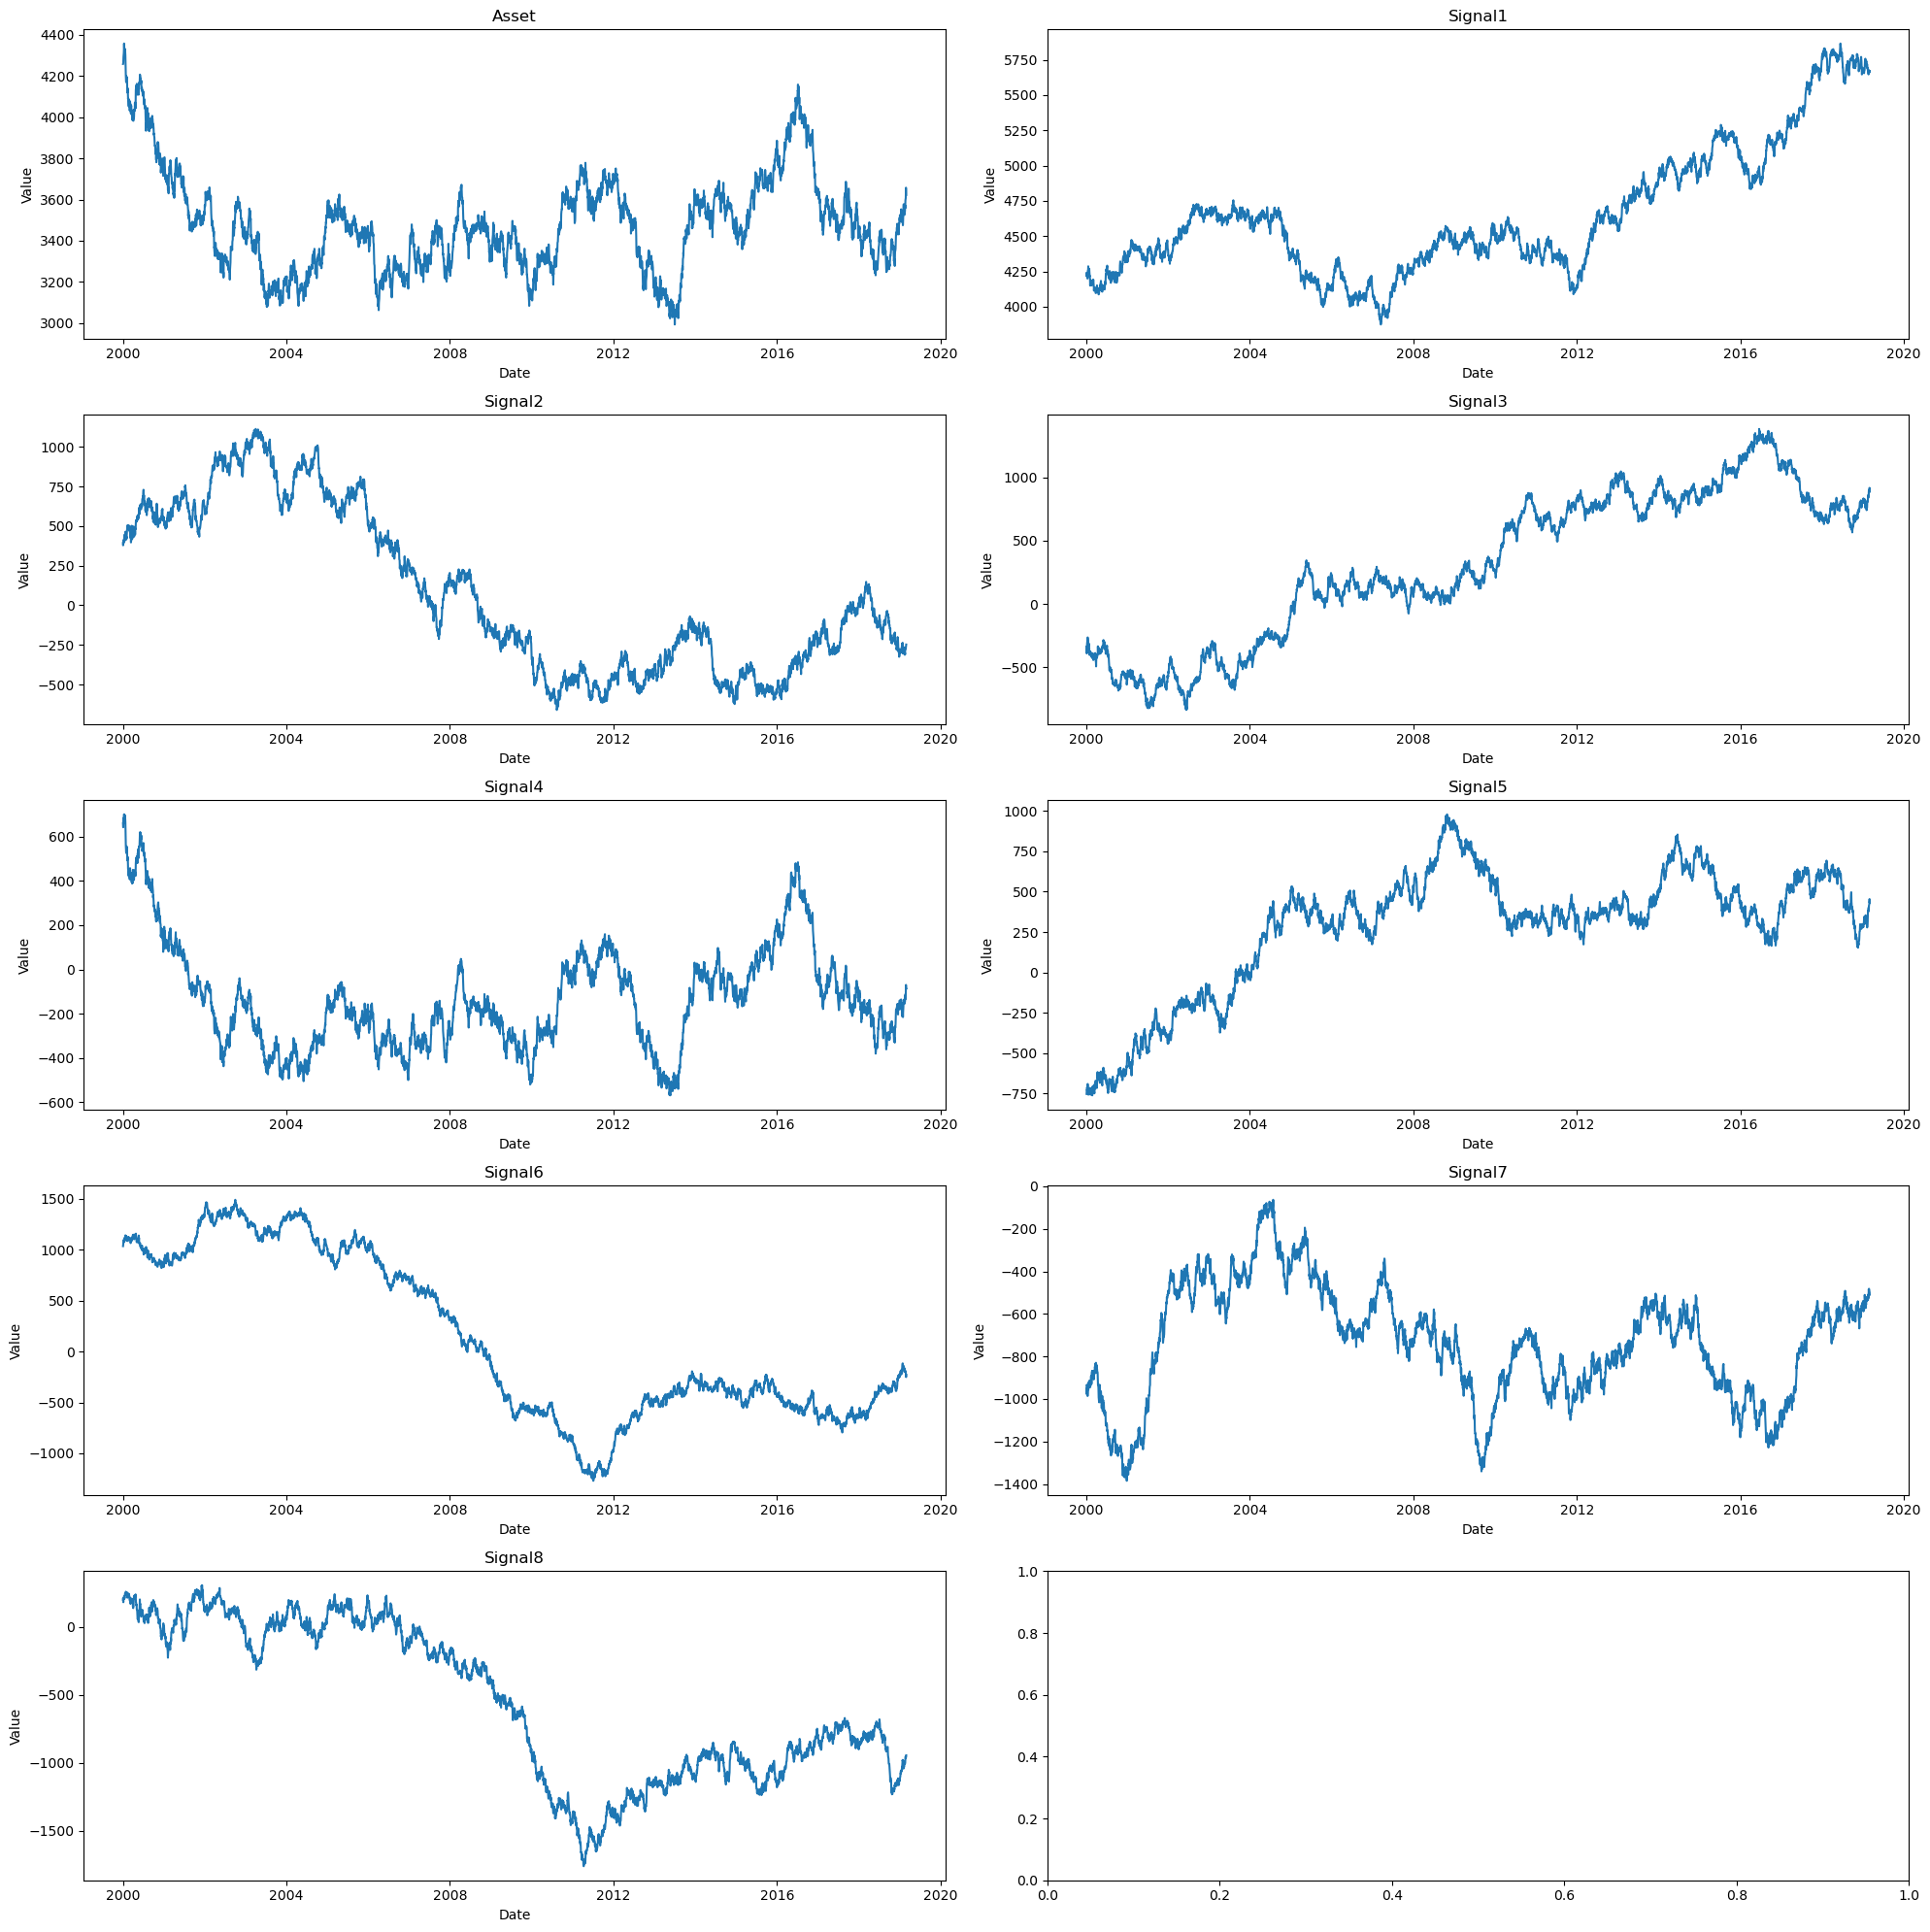

In [16]:
features = [f"Signal{i}" for i in range(1, 9)]
outcomes = ["Asset"]

# Plot time series of features
fig, ax = plt.subplots(5, 2, figsize=(20, 20))

for i in range(len(df.columns)):
    x_pos = i % 2
    y_pos = int((i - x_pos) / 2)
    sns.lineplot(df.iloc[:,i], ax=ax[y_pos, x_pos])
    ax[y_pos, x_pos].set_title(df.columns[i])
    ax[y_pos, x_pos].set_ylabel("Value")
    
plt.tight_layout()
plt.show()

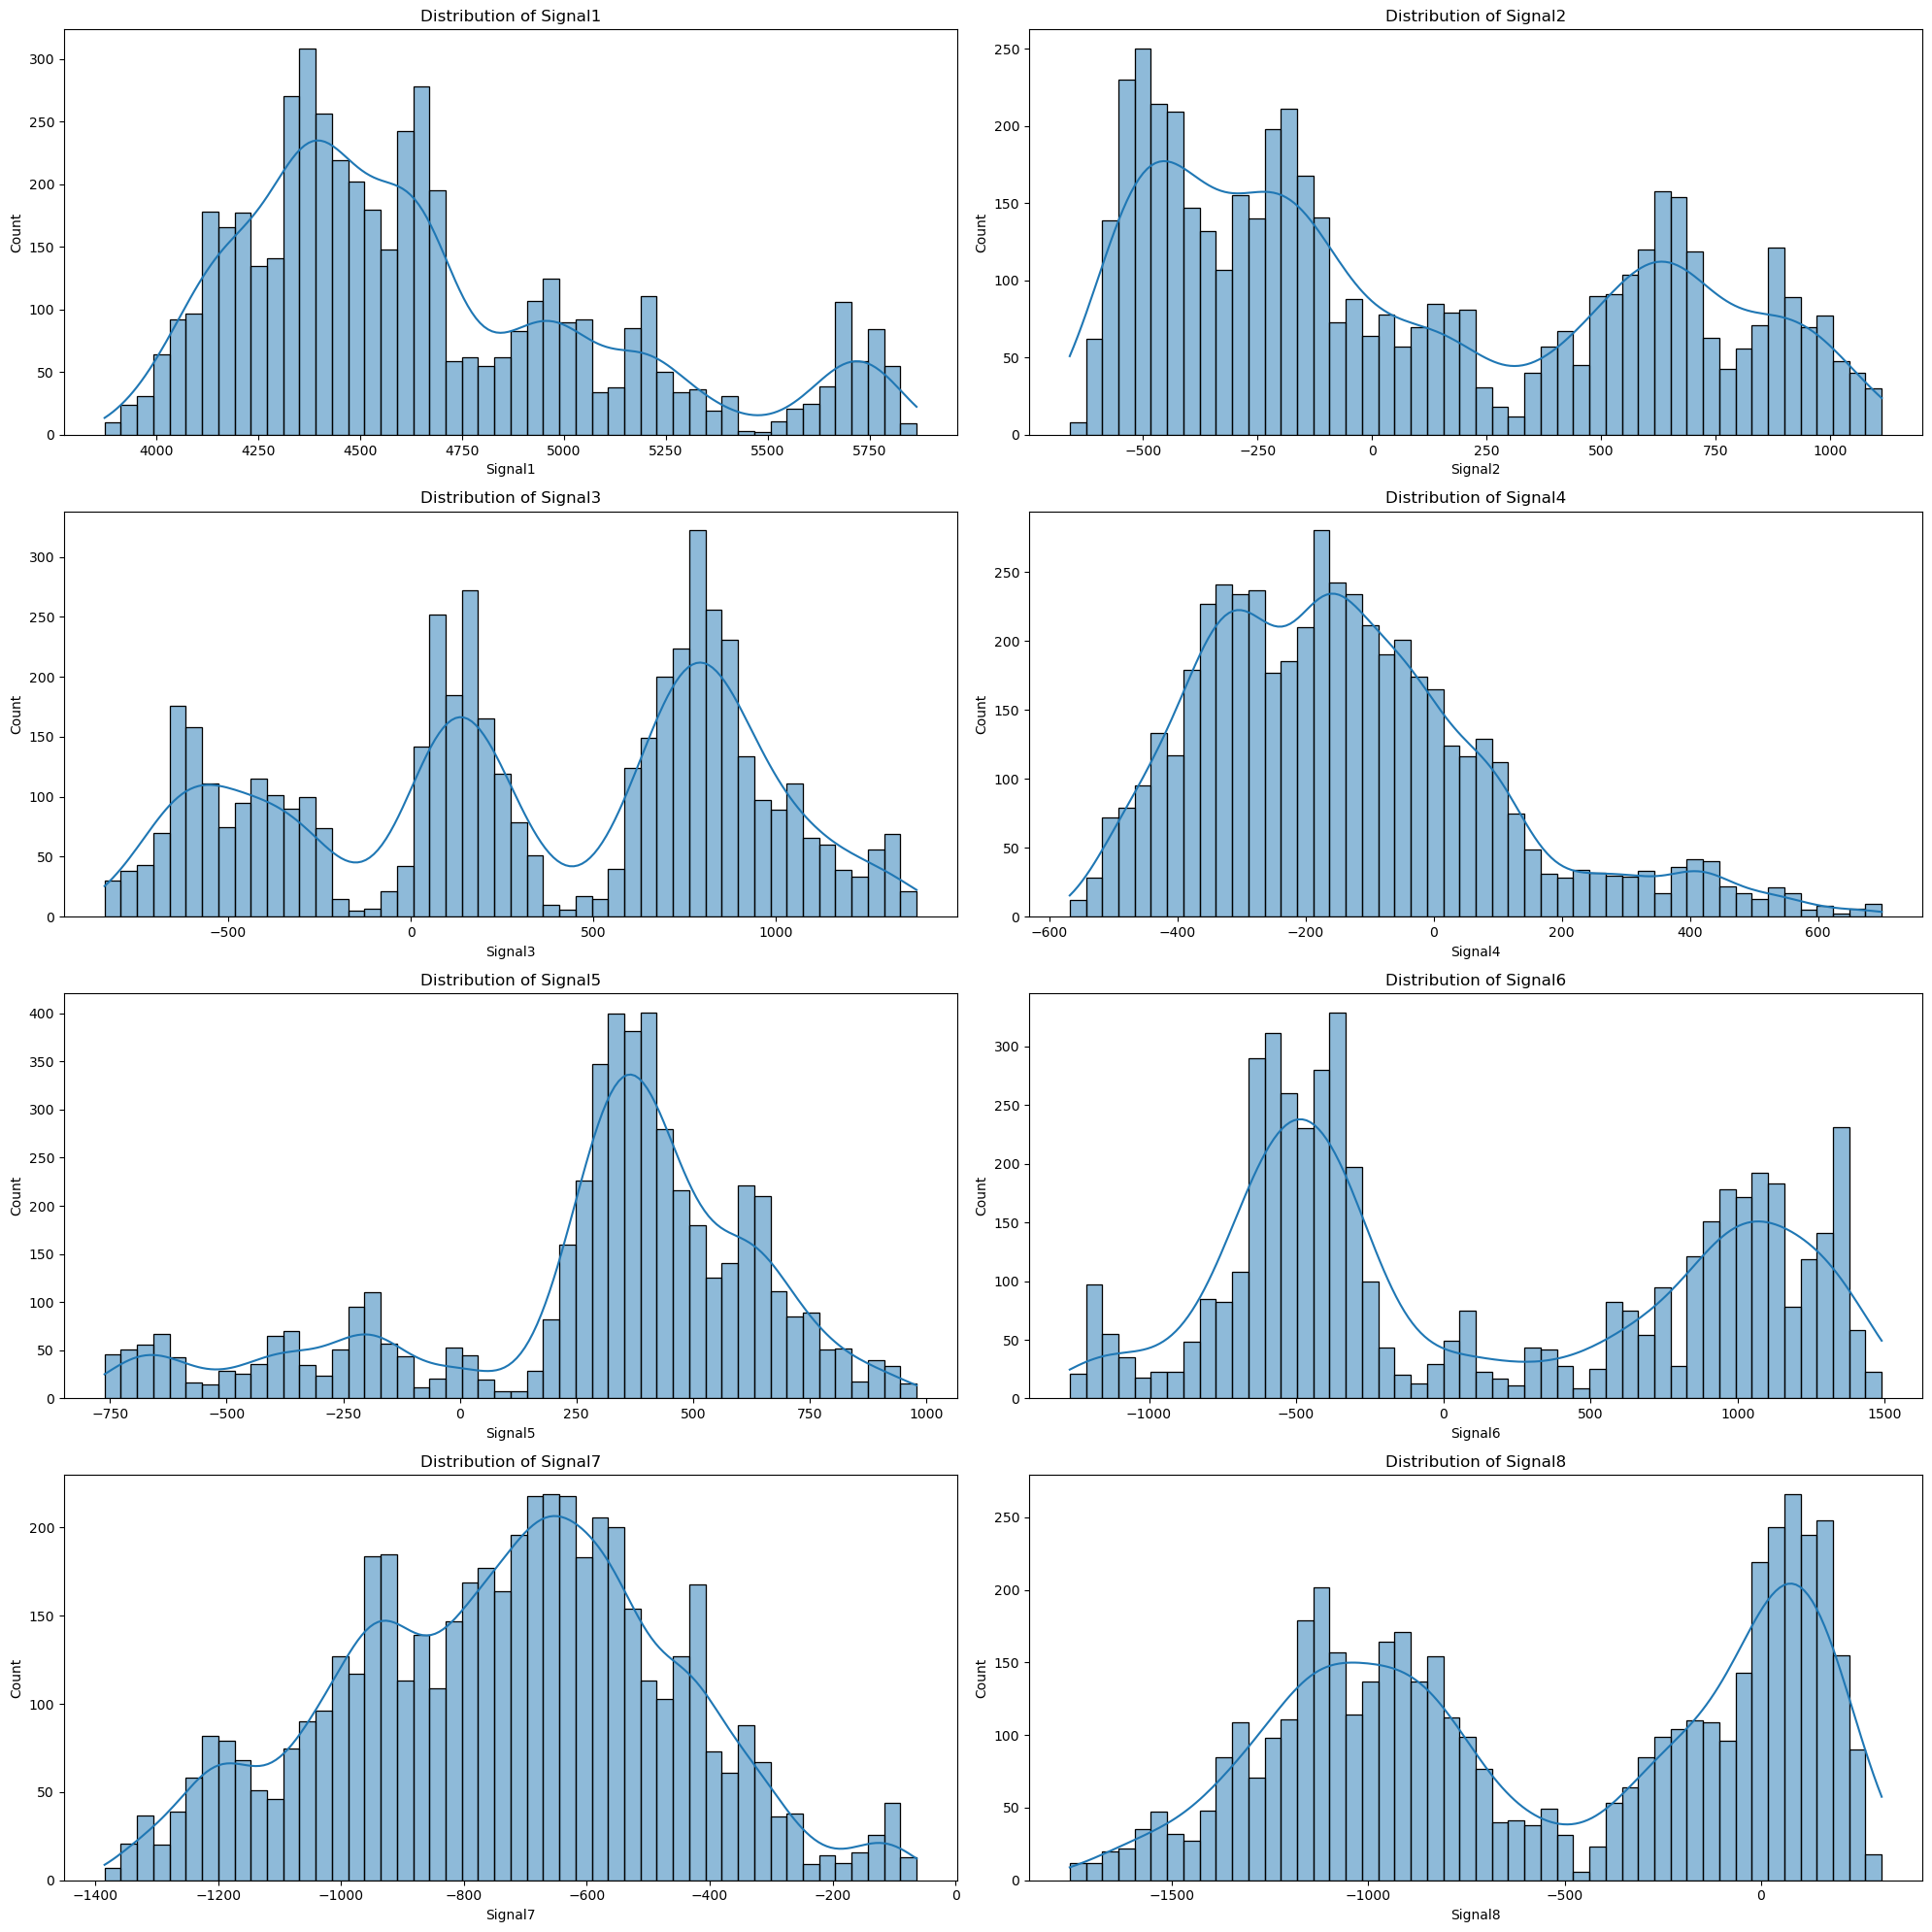

In [17]:
fig, ax = plt.subplots(4, 2, figsize=(20, 20))

for i in range(len(features)):
    x_pos = i % 2
    y_pos = int((i - x_pos) / 2)
    sns.histplot(df[features[i]], ax=ax[y_pos, x_pos], kde=True, bins=50)
    
    ax[y_pos, x_pos].set_title(f"Distribution of {features[i]}")
    
plt.tight_layout()
plt.show()

In [18]:
dfr = df.copy() # going to be altering columns

# Signal 1


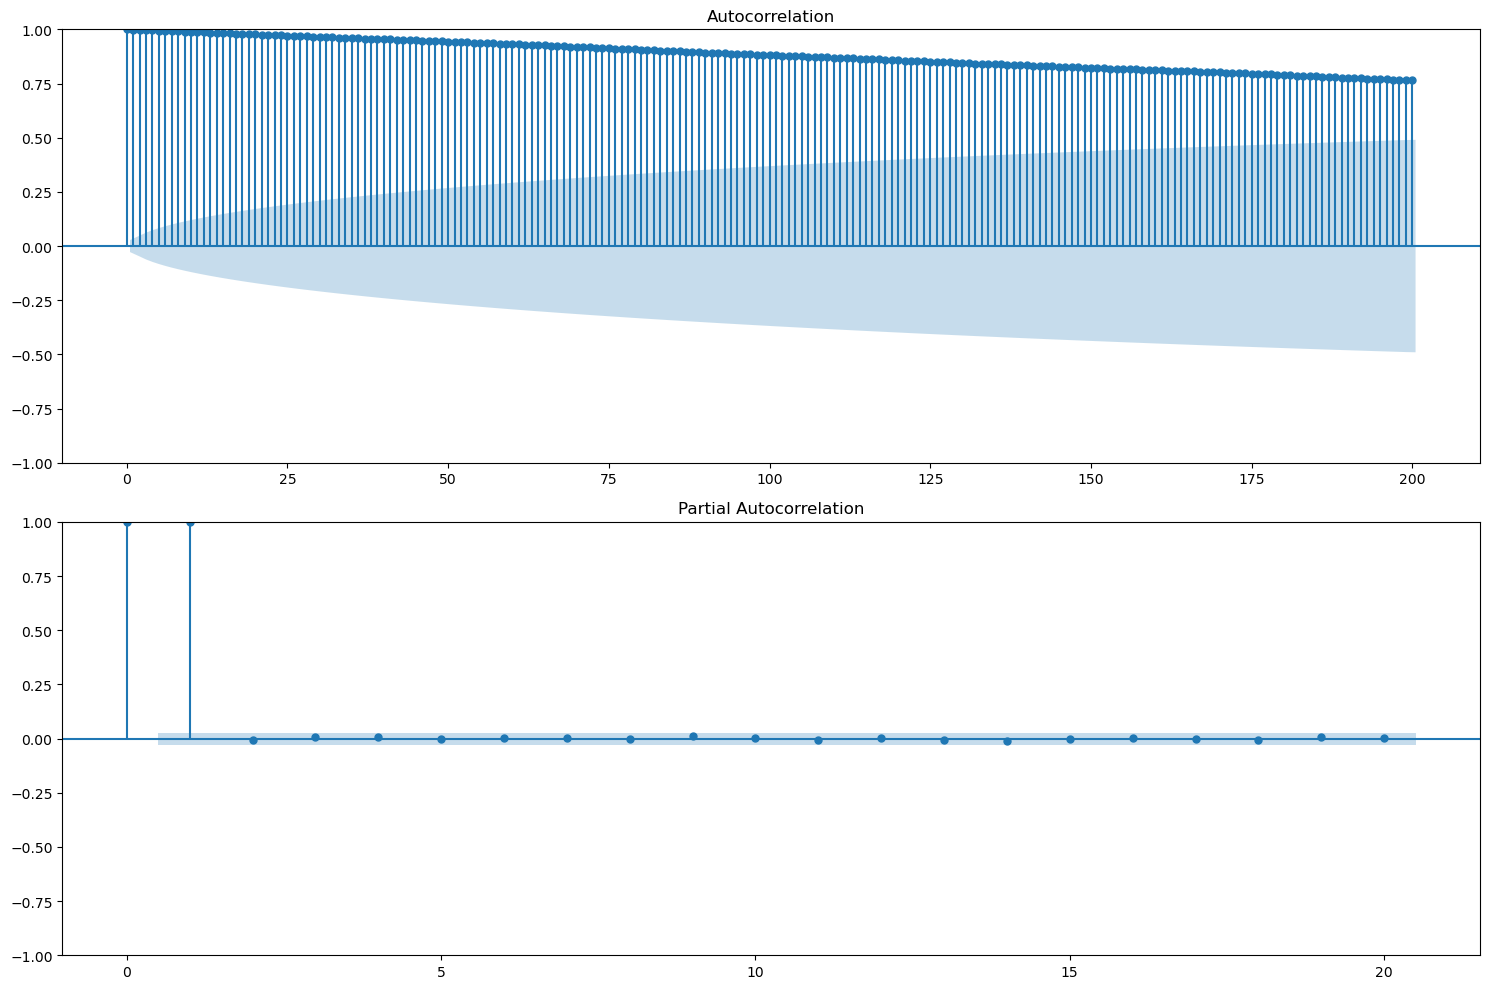

ADF Statistic: -0.38
p-value: 0.91
Not Stationary


In [19]:
# Checking for autocorrelation
def check_autocorrelation(data, column):
    fig, ax = plt.subplots(2, 1, figsize=(15, 10))
    plot_acf(data[column], lags=200, ax=ax[0], alpha=0.05)
    plot_pacf(data[column], lags=20, ax=ax[1], alpha=0.05)

    plt.tight_layout()
    plt.show()

    result = ts.adfuller(data[column])
    print('ADF Statistic: {:.2f}'.format(result[0]))
    print('p-value: {:.2f}'.format(result[1]))
    print("Stationary" if result[1] < 0.05 else "Not Stationary")

    return

check_autocorrelation(df, "Signal1")

We see that an MA model will work well and an AR(1) model as well, signalling ARIMA may fix some of the autocorrelation. In addition, the p-value of the ADF is not significant, meaning the data is also not stationary. 

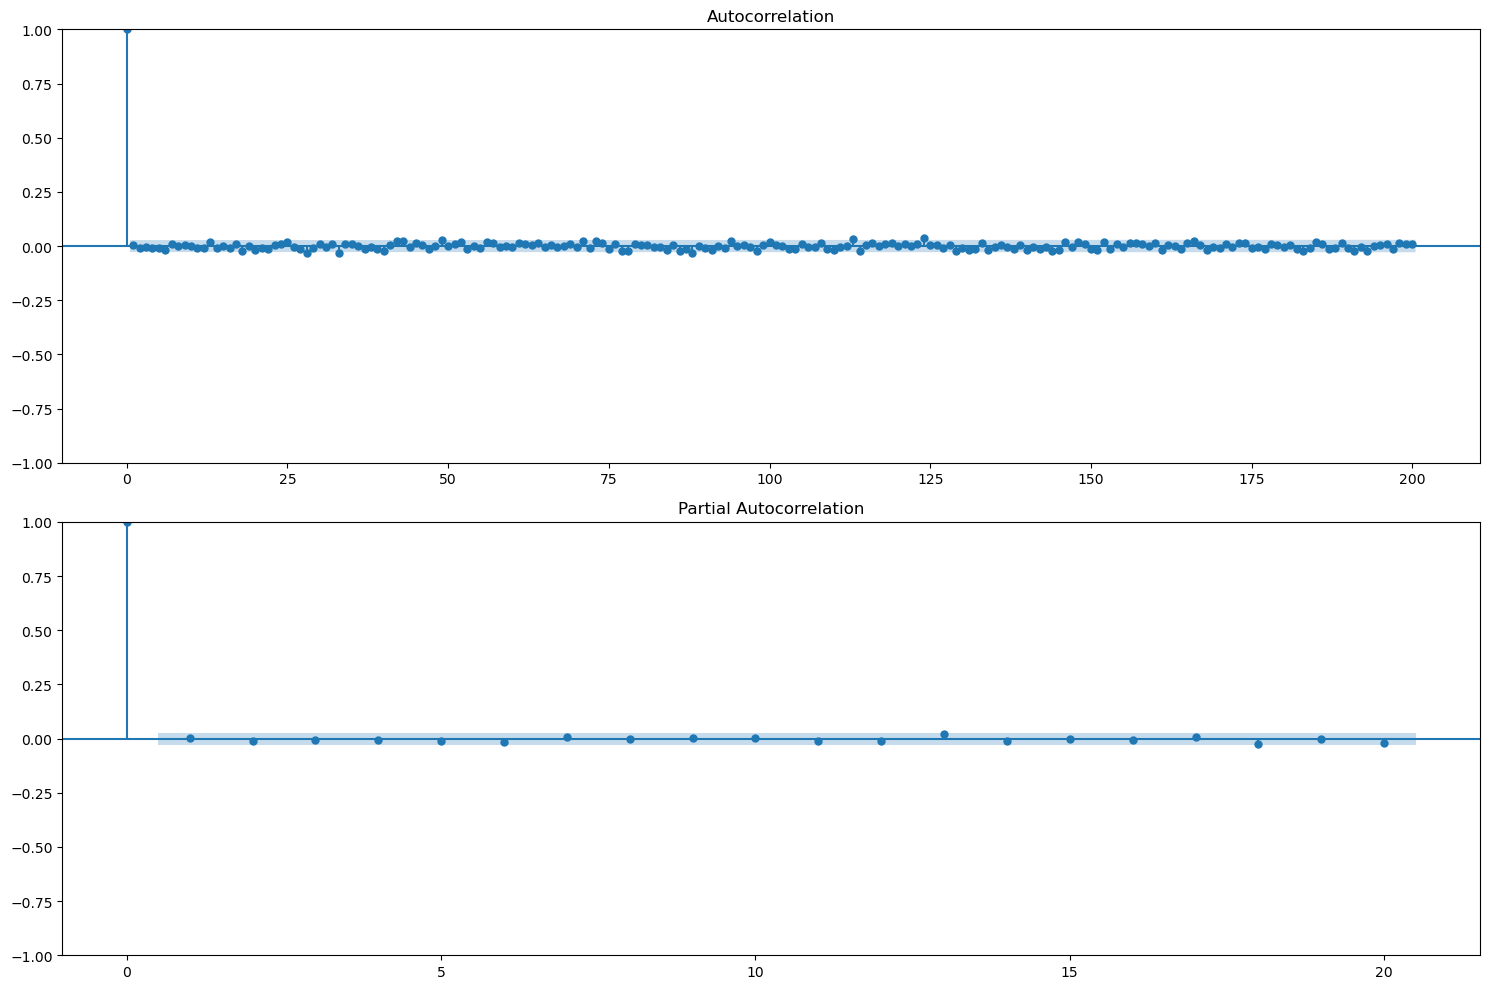

ADF Statistic: -70.47
p-value: 0.00
Stationary


In [20]:
dfr['Signal1_diff'] = dfr['Signal1'].diff().fillna(0)
check_autocorrelation(dfr, 'Signal1_diff')

Now the data is stationary and there is no autocorrelation

<Axes: xlabel='Date', ylabel='Signal1_diff'>

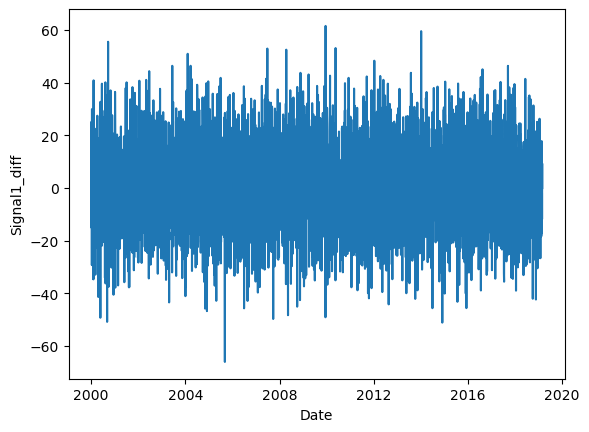

In [21]:
sns.lineplot(dfr.Signal1_diff)

# Signal 2

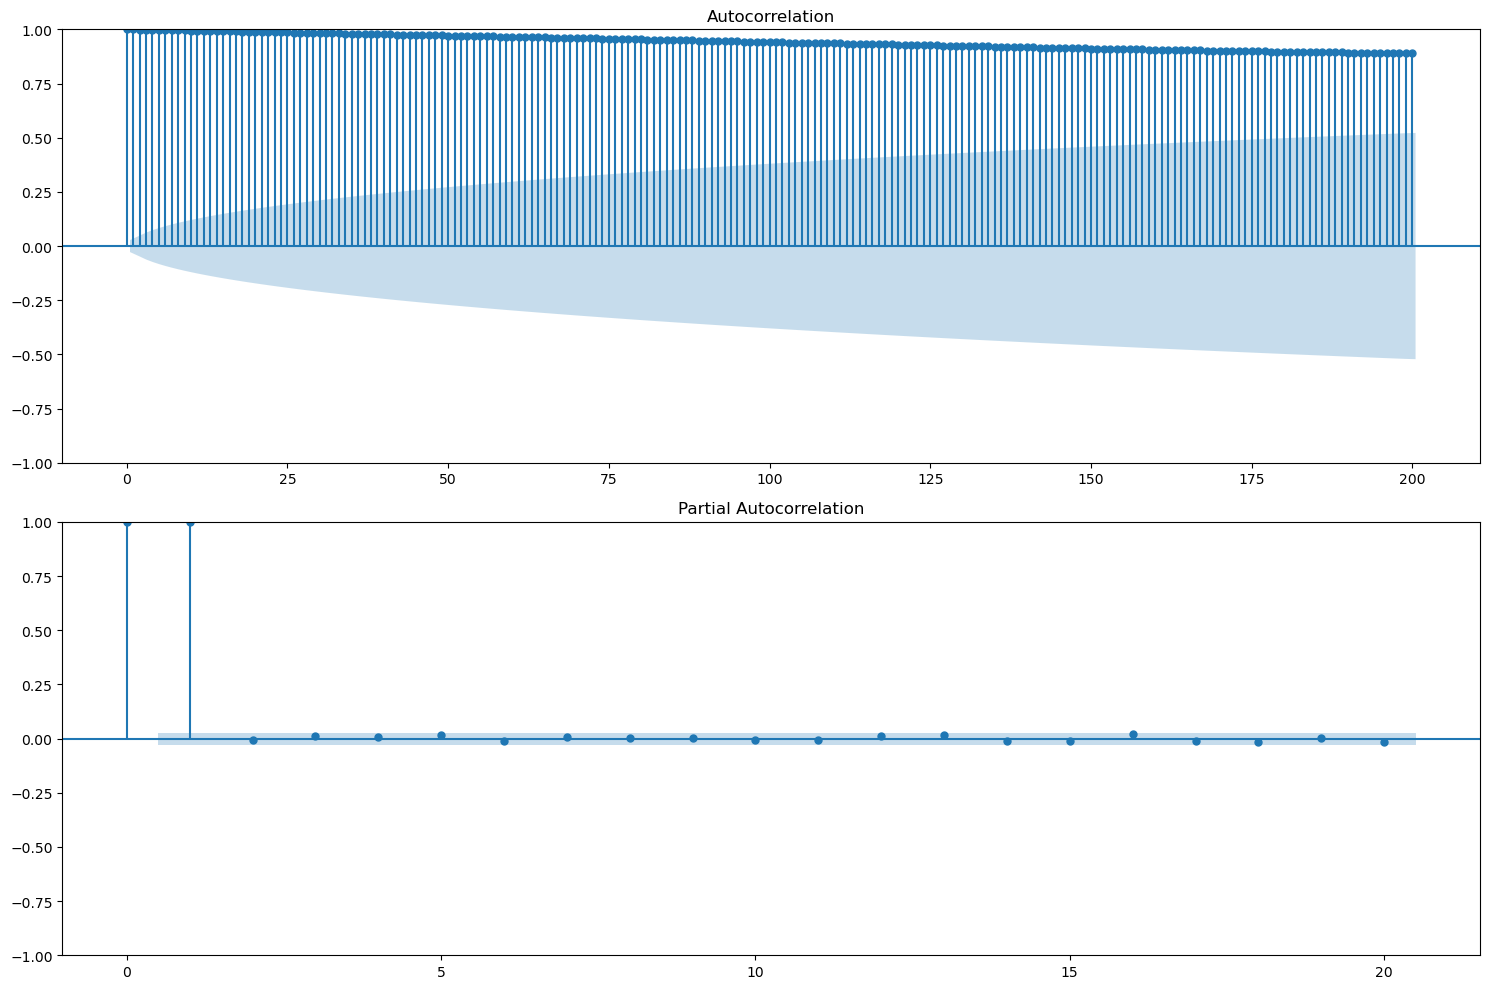

ADF Statistic: -1.14
p-value: 0.70
Not Stationary


In [22]:
check_autocorrelation(df, "Signal2")

Same issue as Signal1

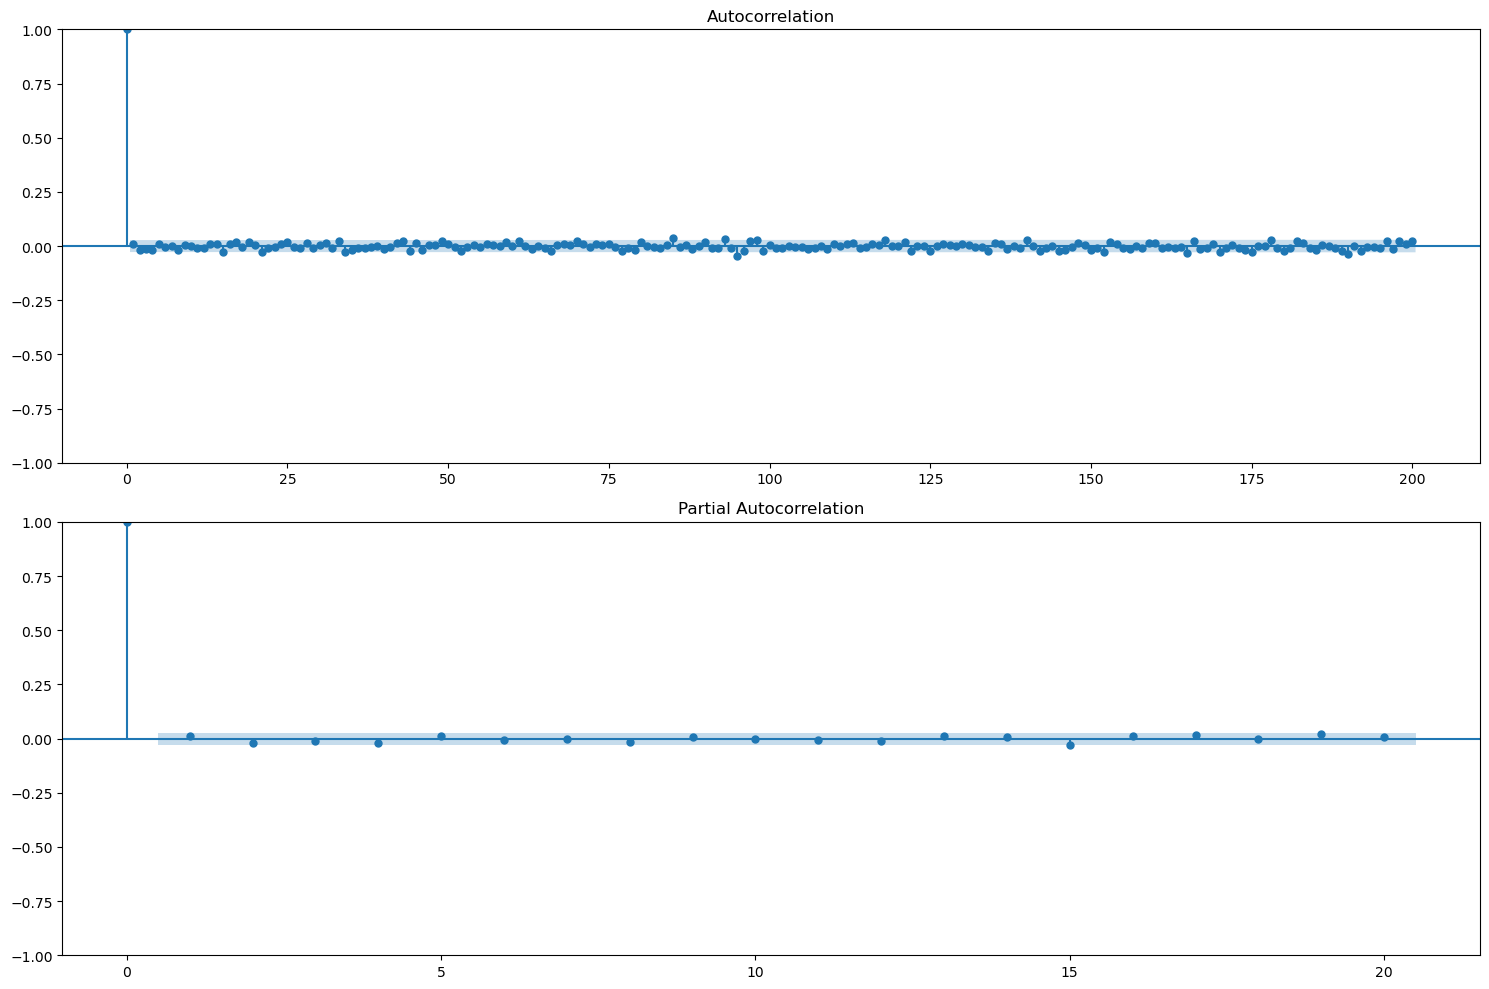

ADF Statistic: -50.73
p-value: 0.00
Stationary


In [23]:
dfr['Signal2_diff'] = dfr['Signal2'].diff().fillna(0)
check_autocorrelation(dfr, 'Signal2_diff')

# Signal3

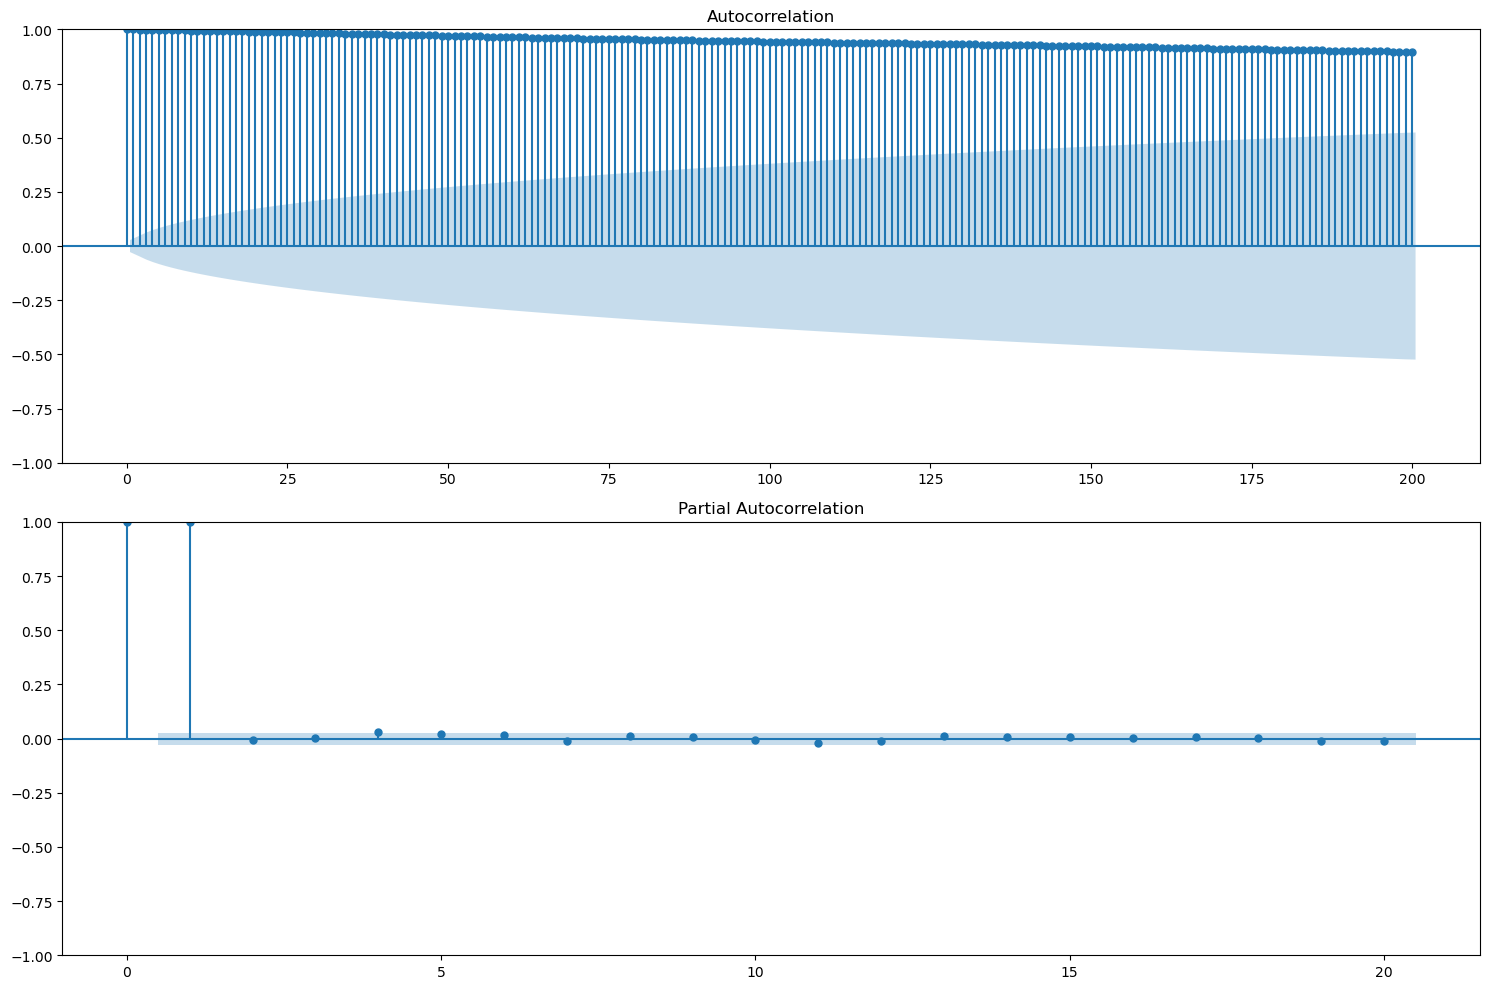

ADF Statistic: -1.05
p-value: 0.73
Not Stationary


In [24]:
check_autocorrelation(df, "Signal3")

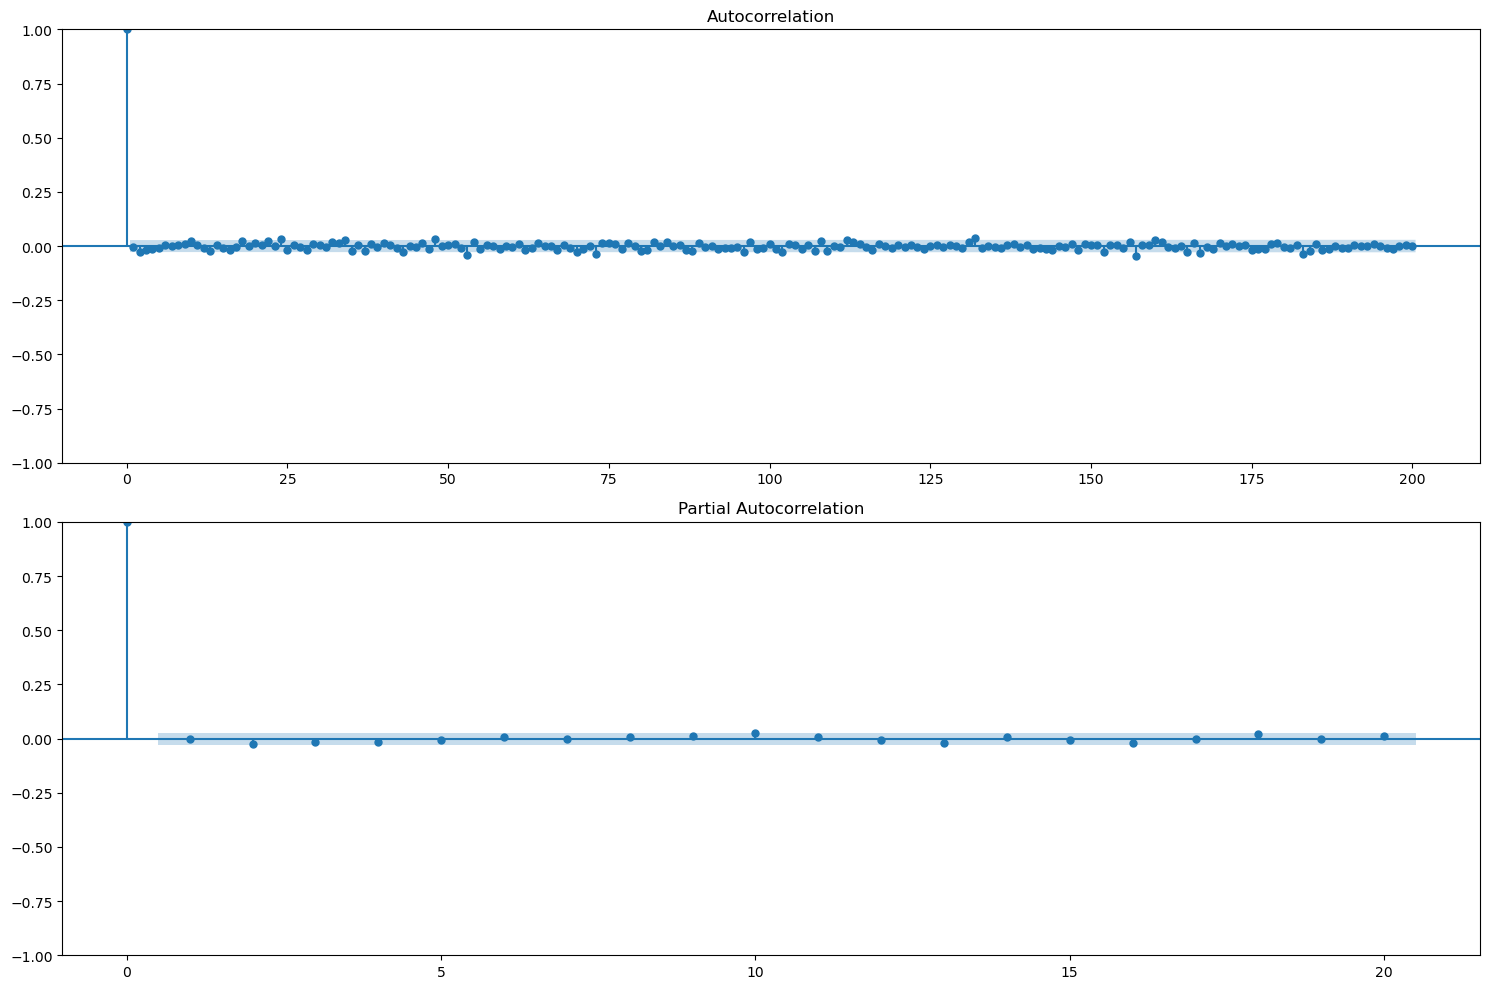

ADF Statistic: -51.33
p-value: 0.00
Stationary


In [25]:
dfr['Signal3_diff'] = dfr['Signal3'].diff().fillna(0)
check_autocorrelation(dfr, 'Signal3_diff')

# Signal4

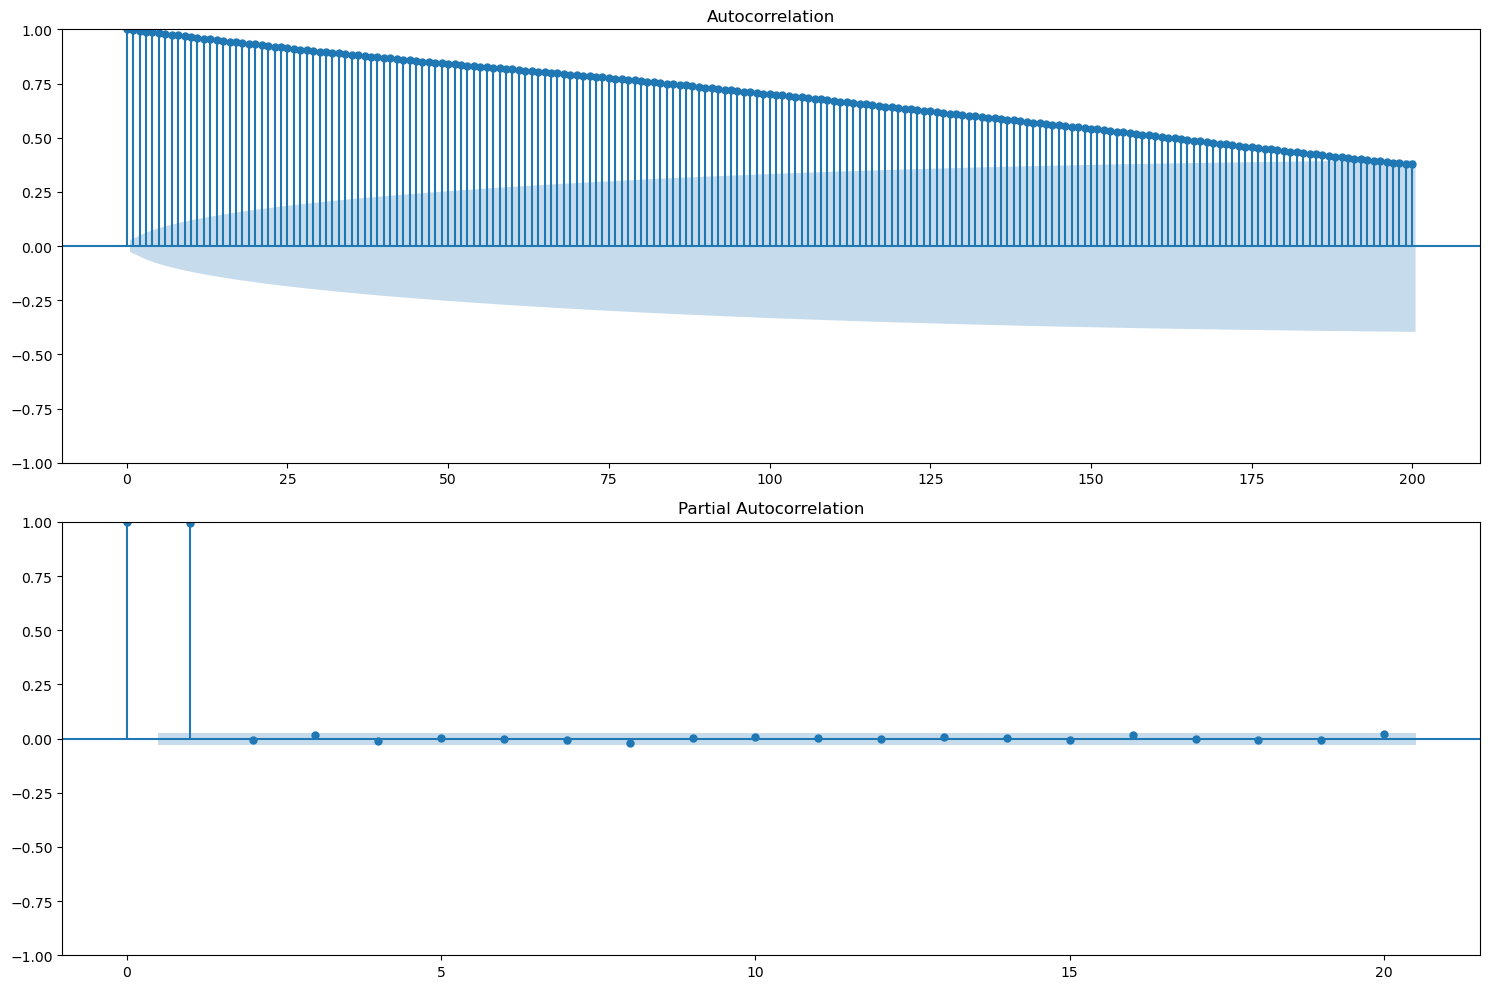

ADF Statistic: -3.64
p-value: 0.00
Stationary


In [26]:
check_autocorrelation(df, "Signal4")

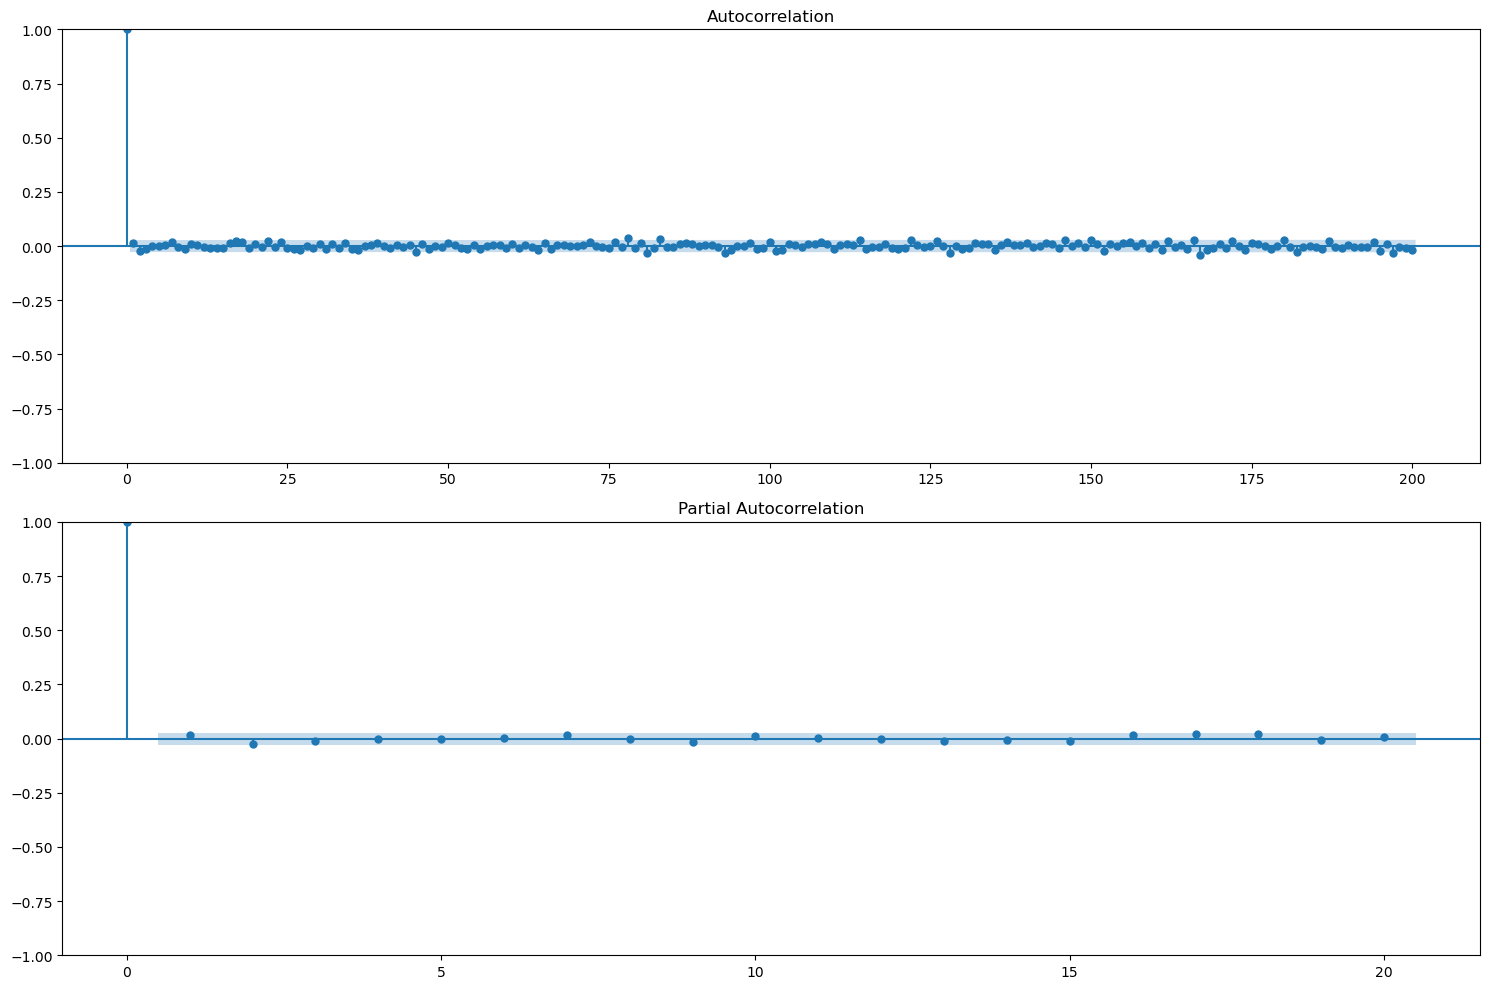

ADF Statistic: -50.78
p-value: 0.00
Stationary


In [27]:
dfr['Signal4_diff'] = dfr['Signal4'].diff().fillna(0)
check_autocorrelation(dfr, 'Signal4_diff')

# Signal5

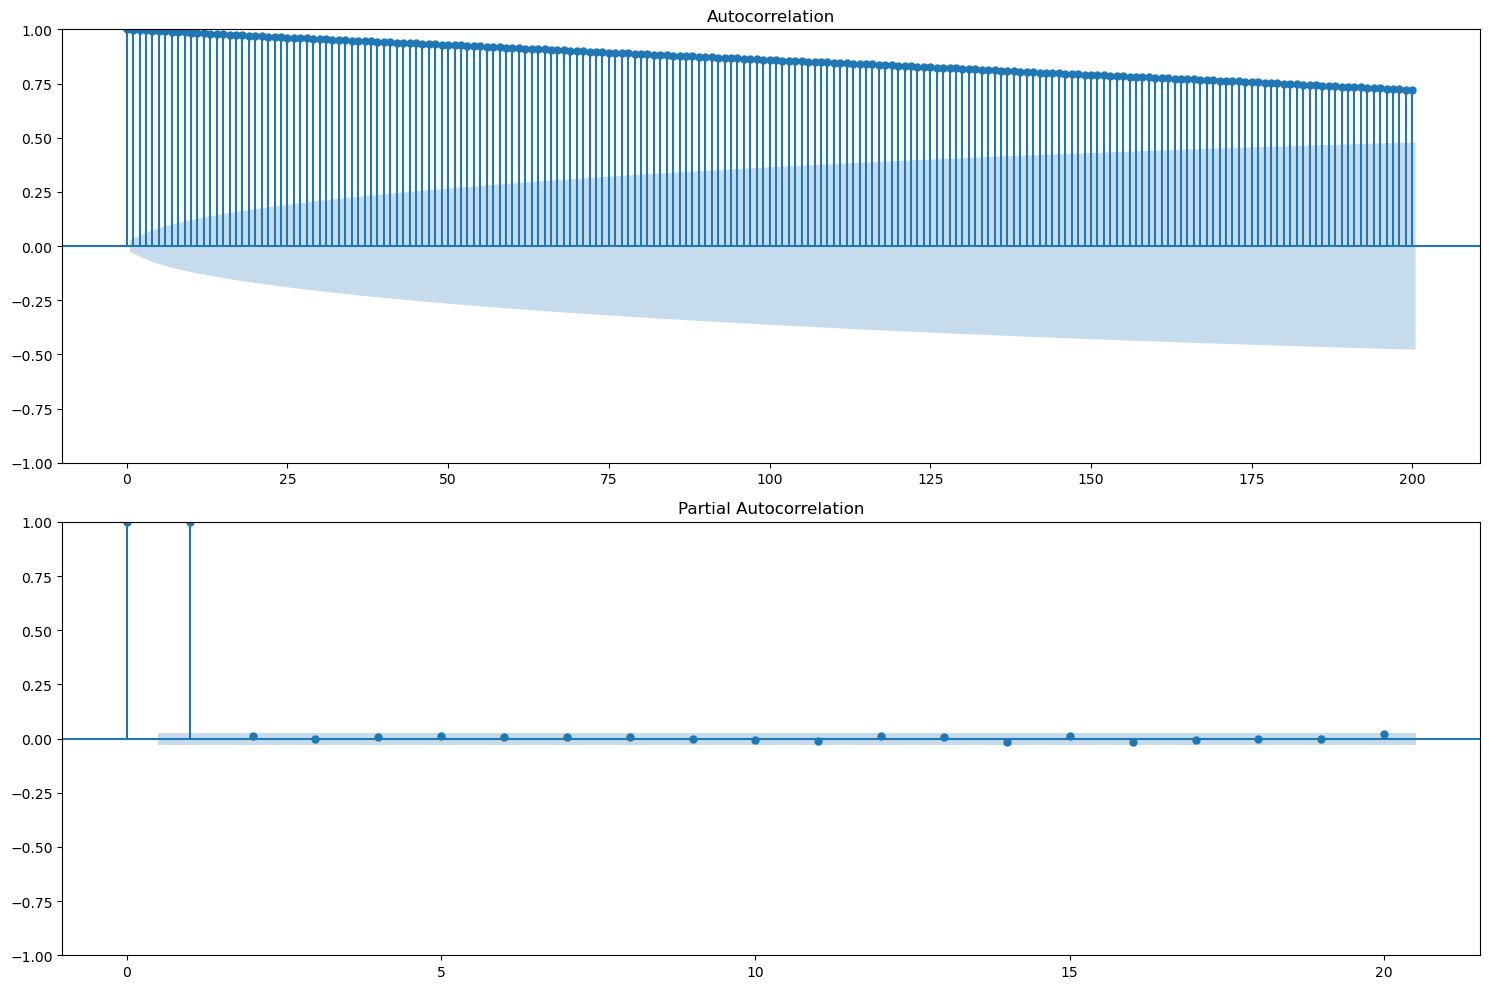

ADF Statistic: -2.71
p-value: 0.07
Not Stationary


In [28]:
check_autocorrelation(df, "Signal5")

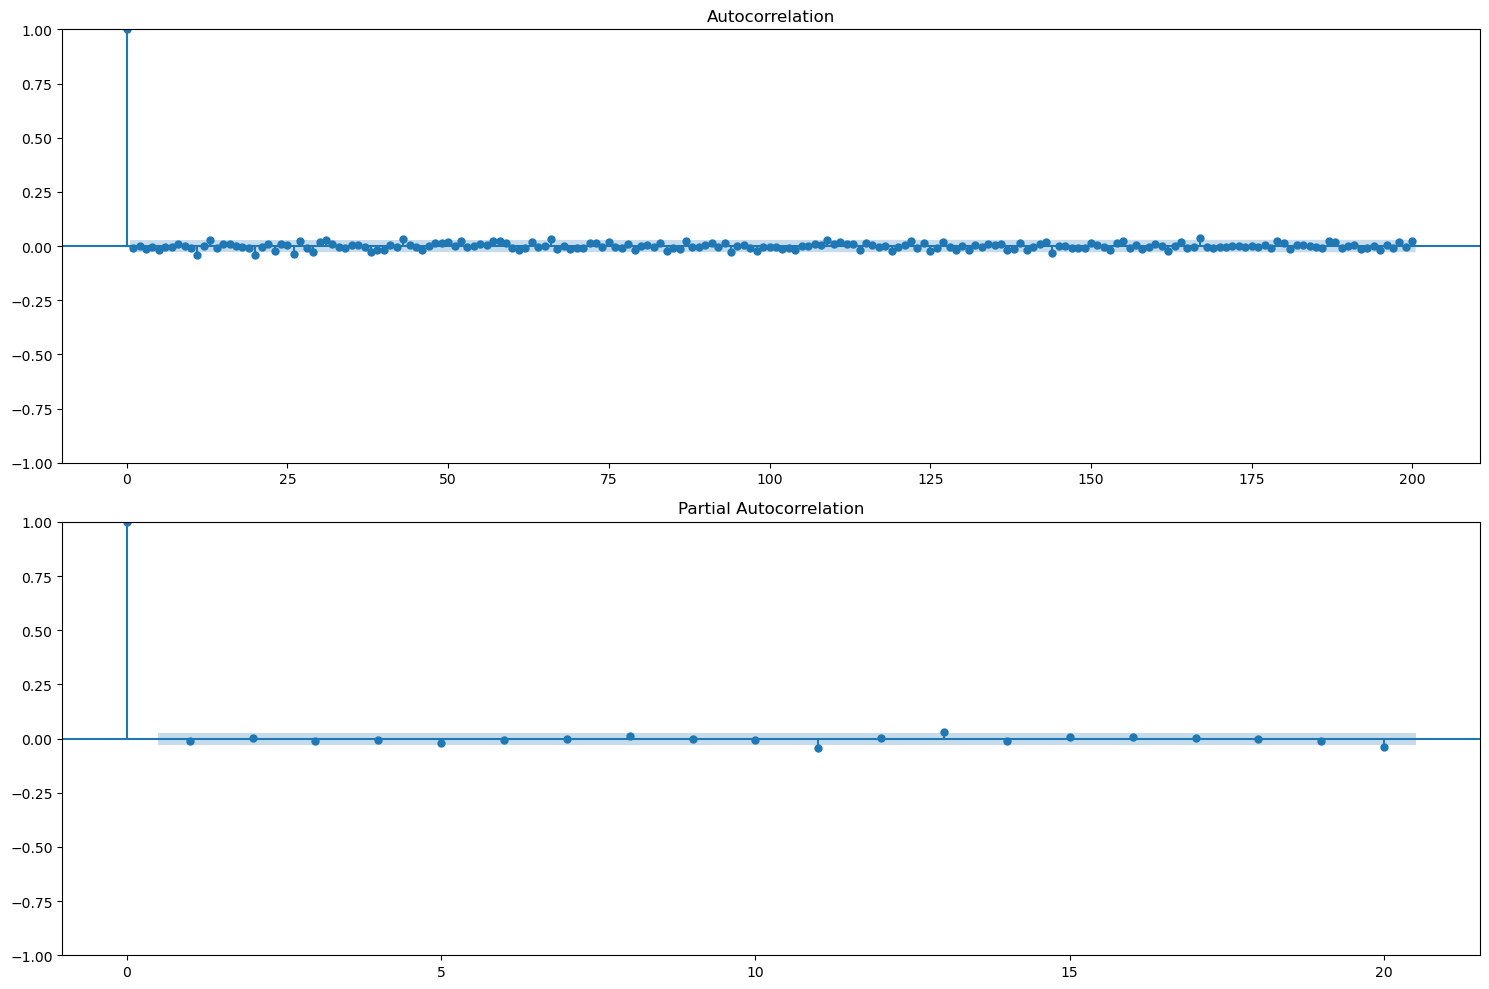

ADF Statistic: -71.35
p-value: 0.00
Stationary


In [29]:
dfr['Signal5_diff'] = dfr['Signal5'].diff().fillna(0)
check_autocorrelation(dfr, 'Signal5_diff')

# Signal6

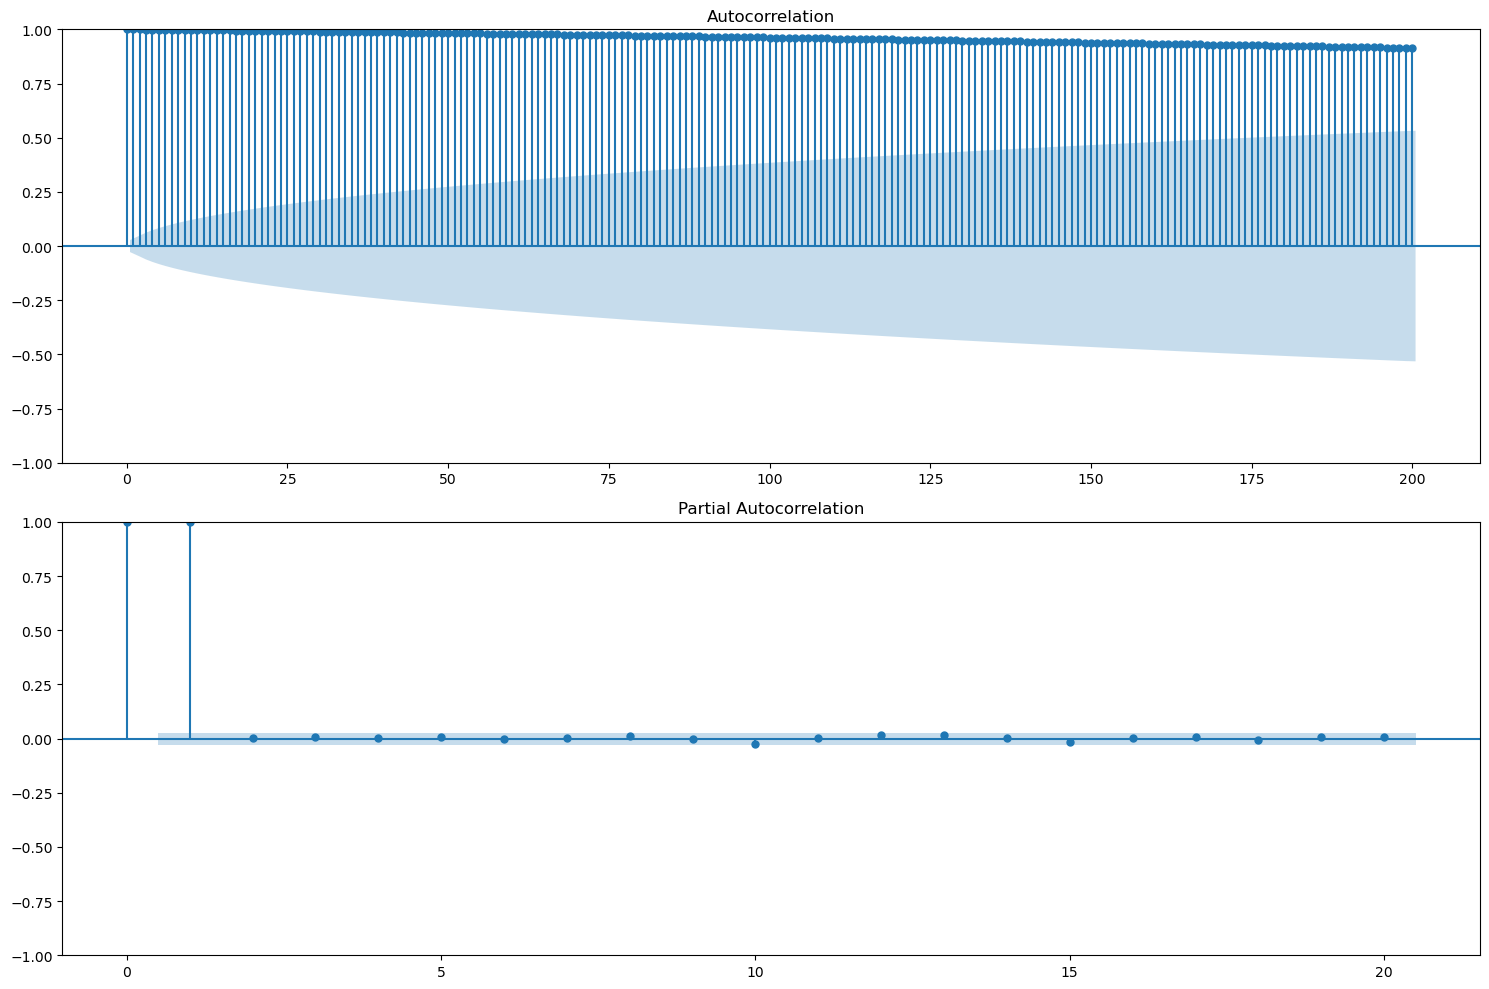

ADF Statistic: -1.10
p-value: 0.72
Not Stationary


In [30]:
check_autocorrelation(df, "Signal6")

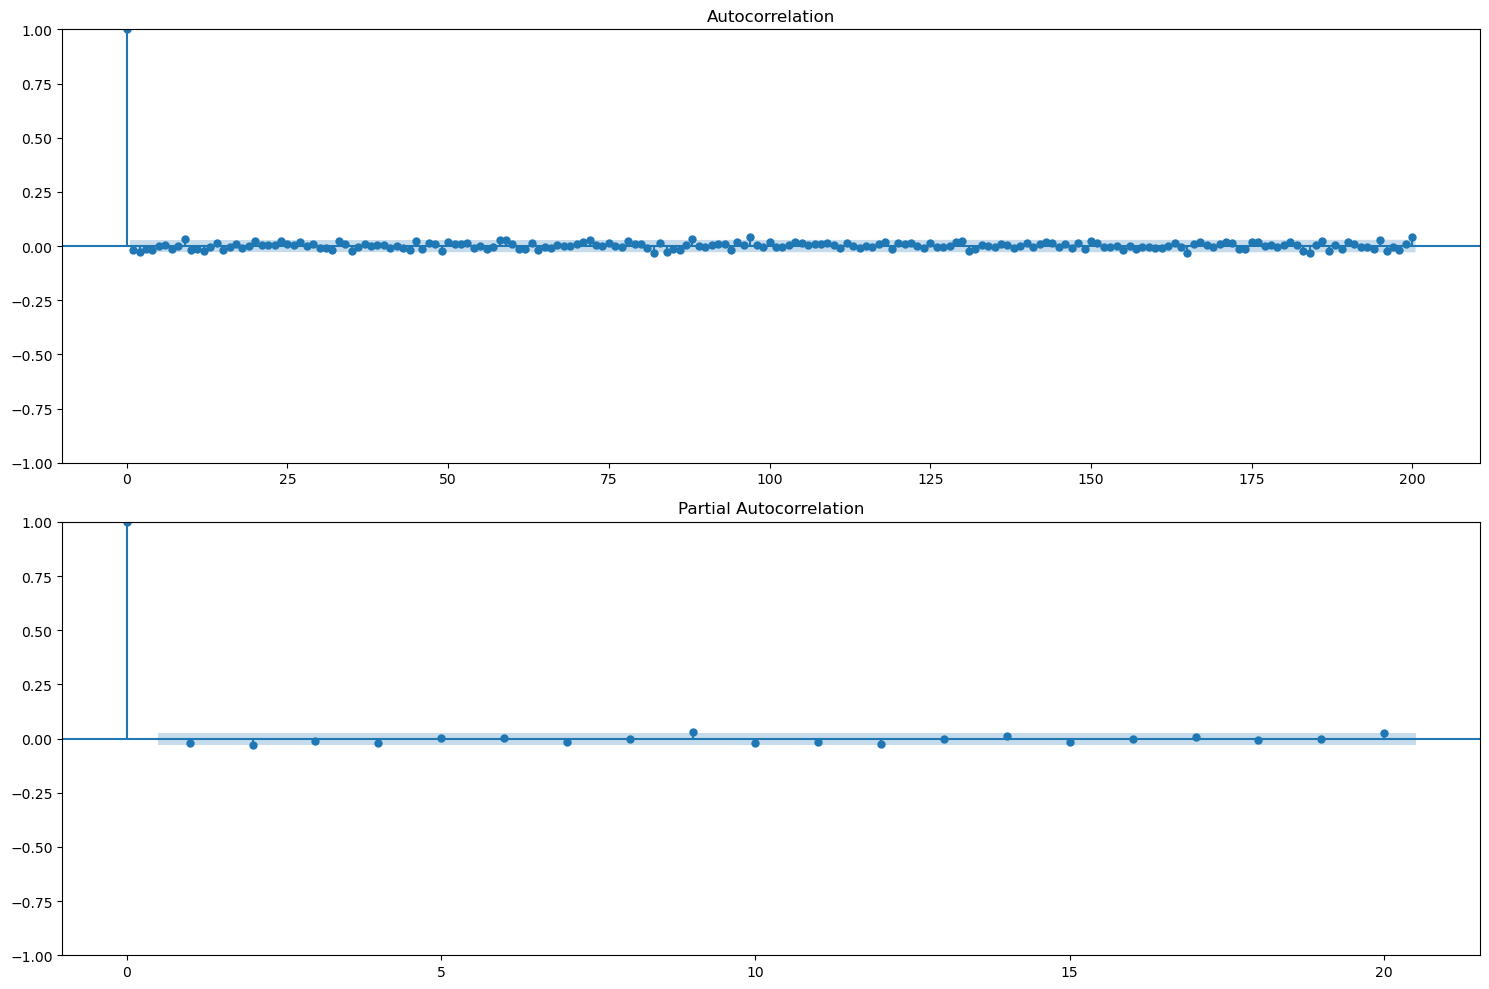

ADF Statistic: -51.88
p-value: 0.00
Stationary


In [31]:
dfr['Signal6_diff'] = dfr['Signal6'].diff().fillna(0)
check_autocorrelation(dfr, 'Signal6_diff')

# Signal7

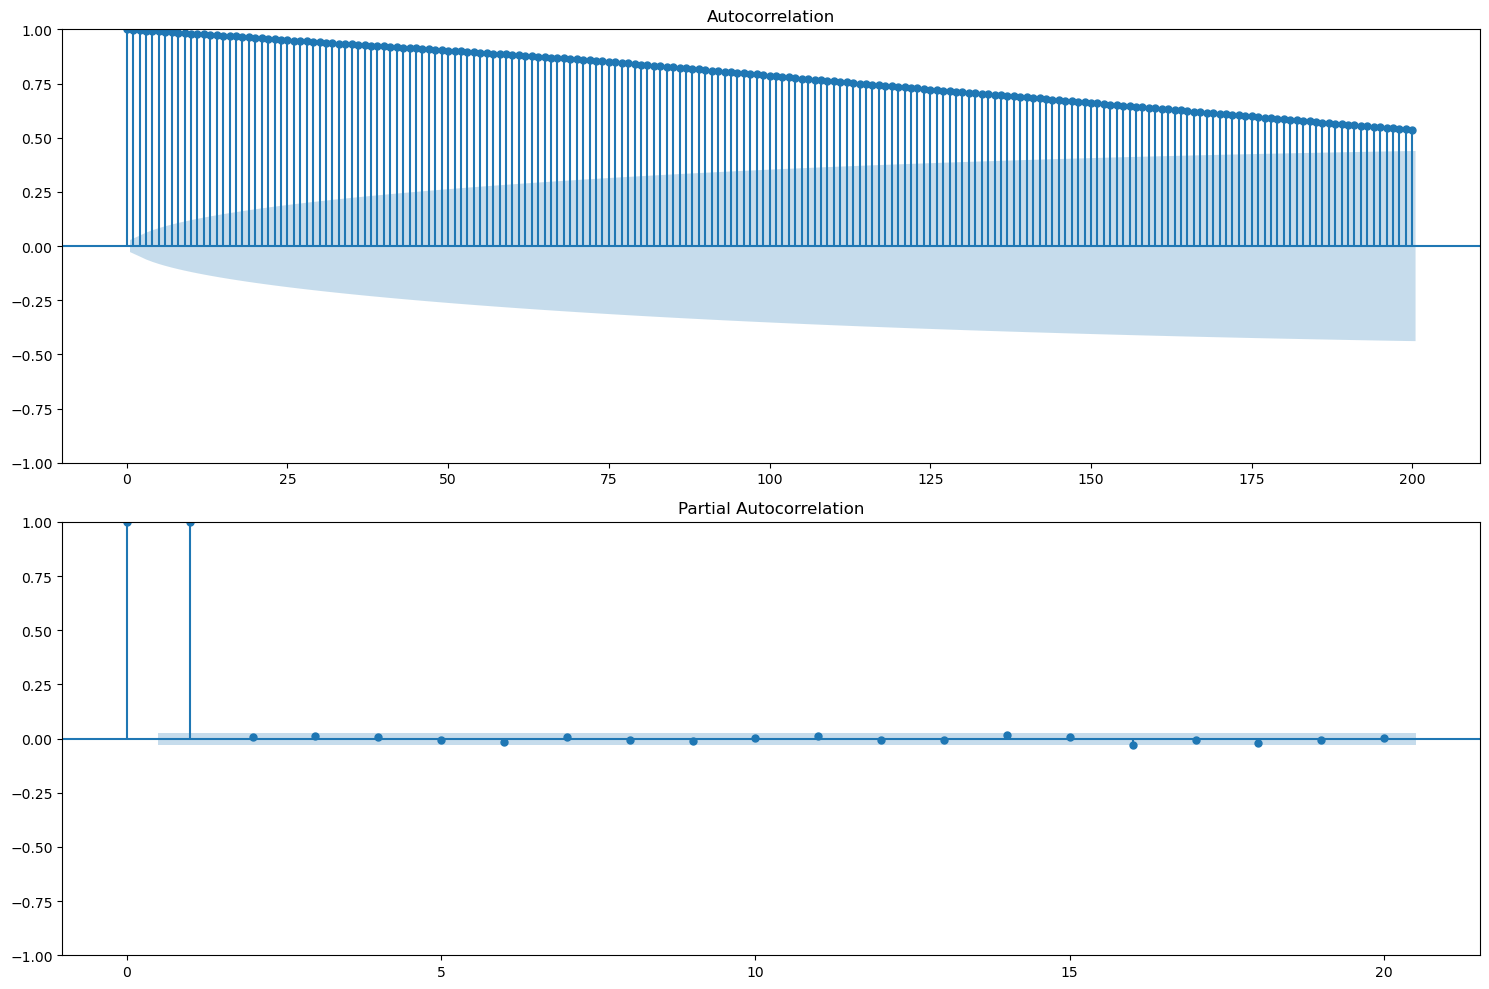

ADF Statistic: -2.14
p-value: 0.23
Not Stationary


In [32]:
check_autocorrelation(df, "Signal7")

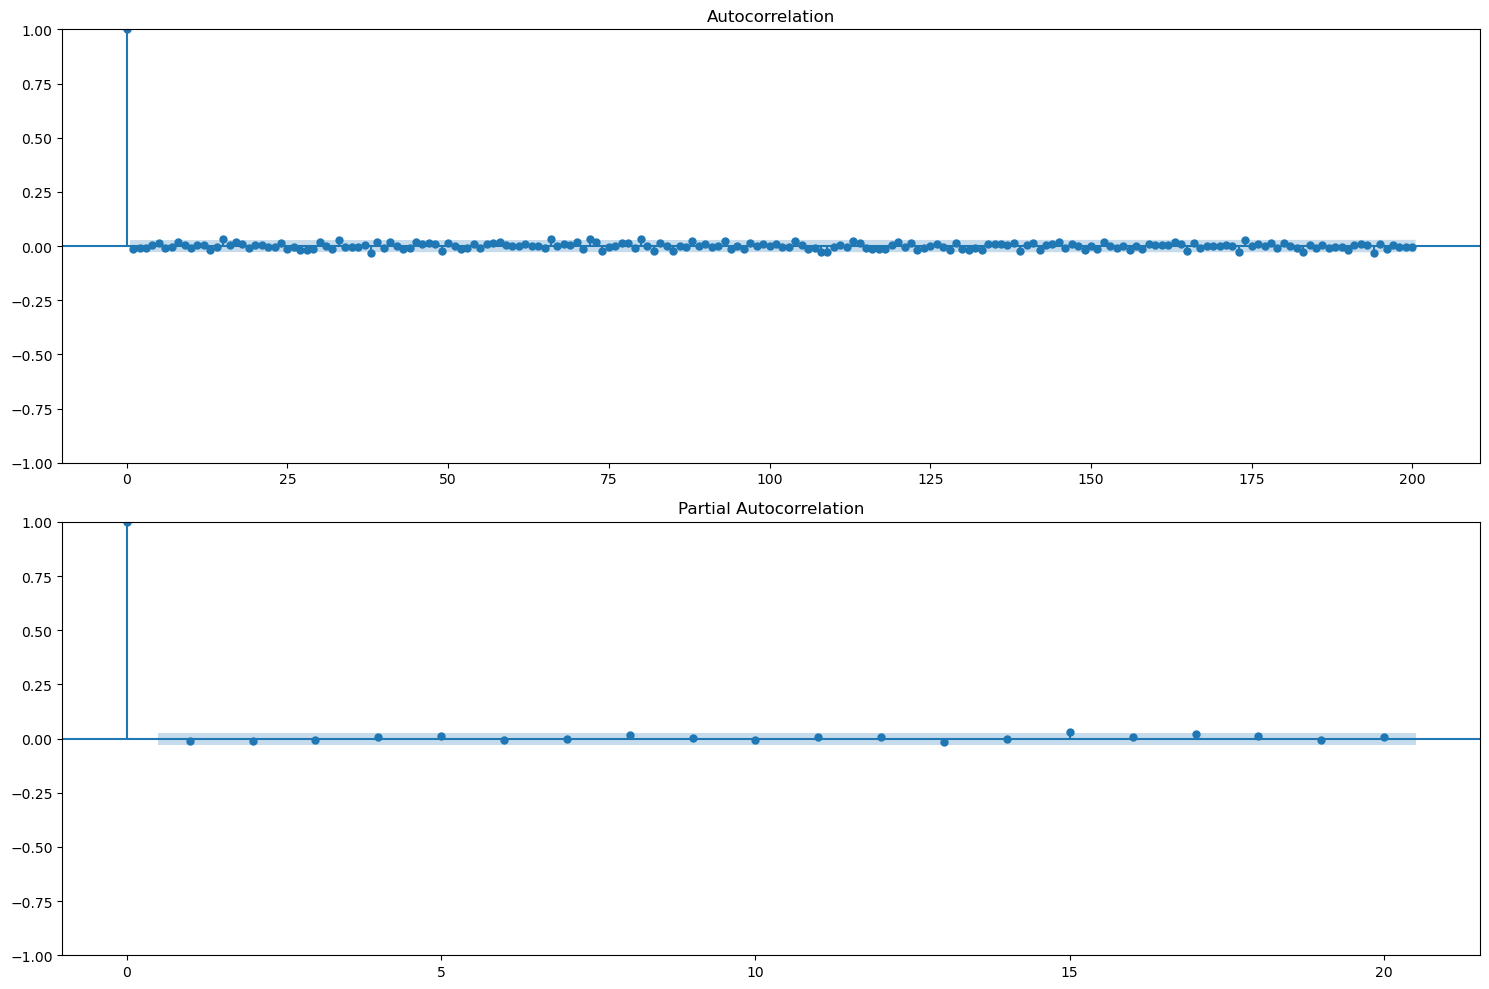

ADF Statistic: -71.62
p-value: 0.00
Stationary


In [33]:
dfr['Signal7_diff'] = dfr['Signal7'].diff().fillna(0)
check_autocorrelation(dfr, 'Signal7_diff')

# Signal8

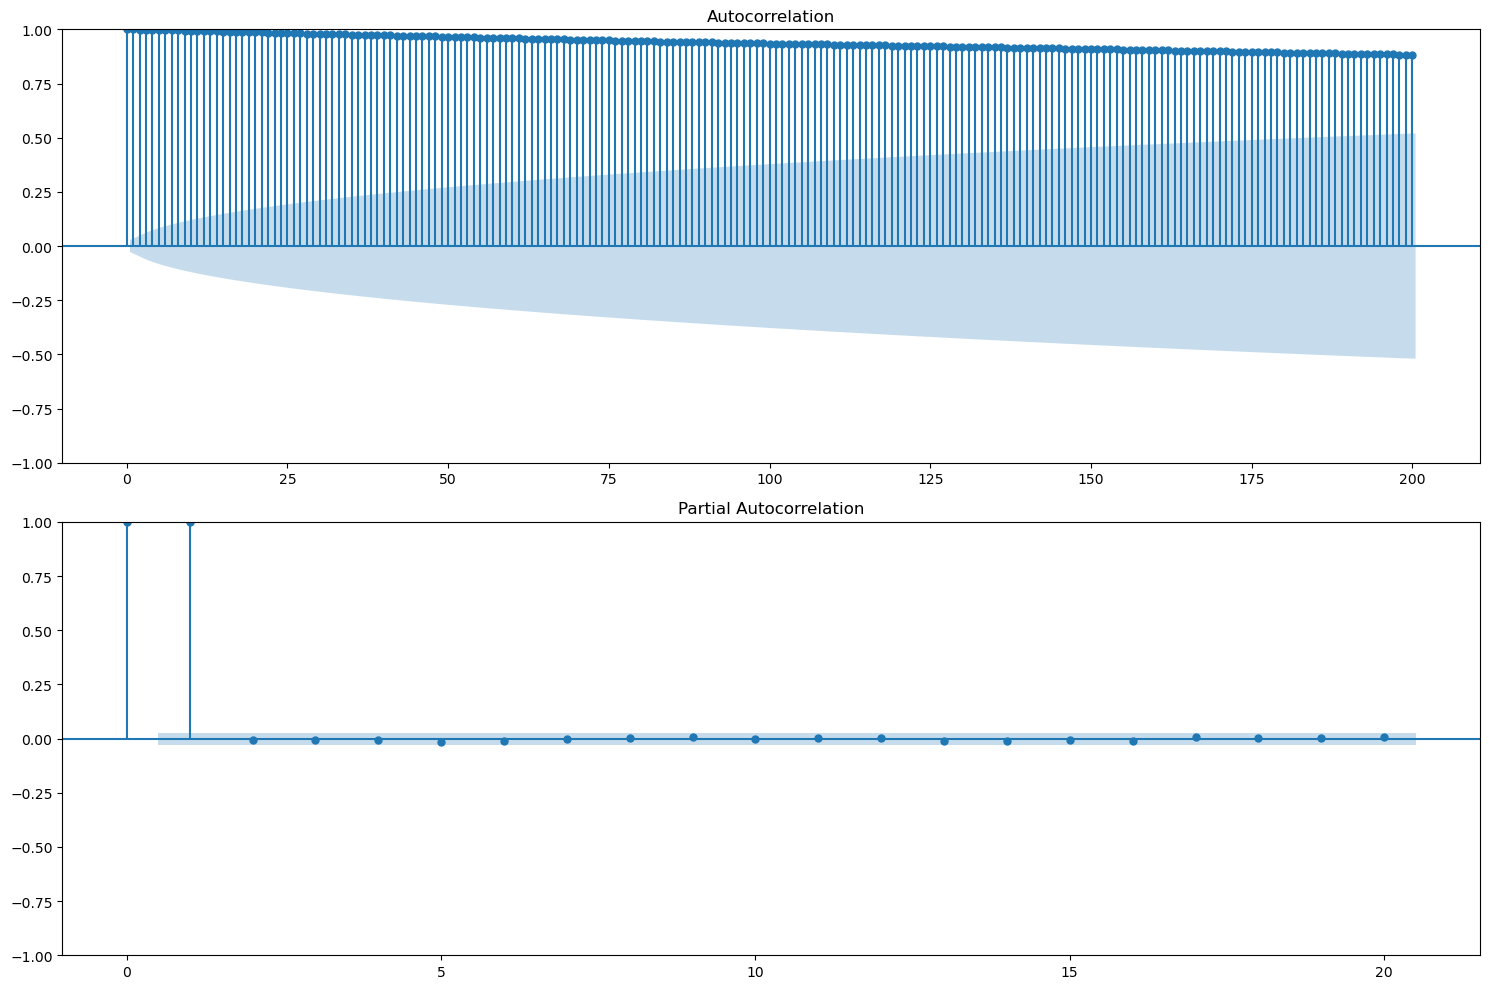

ADF Statistic: -1.33
p-value: 0.62
Not Stationary


In [34]:
check_autocorrelation(df, "Signal8")

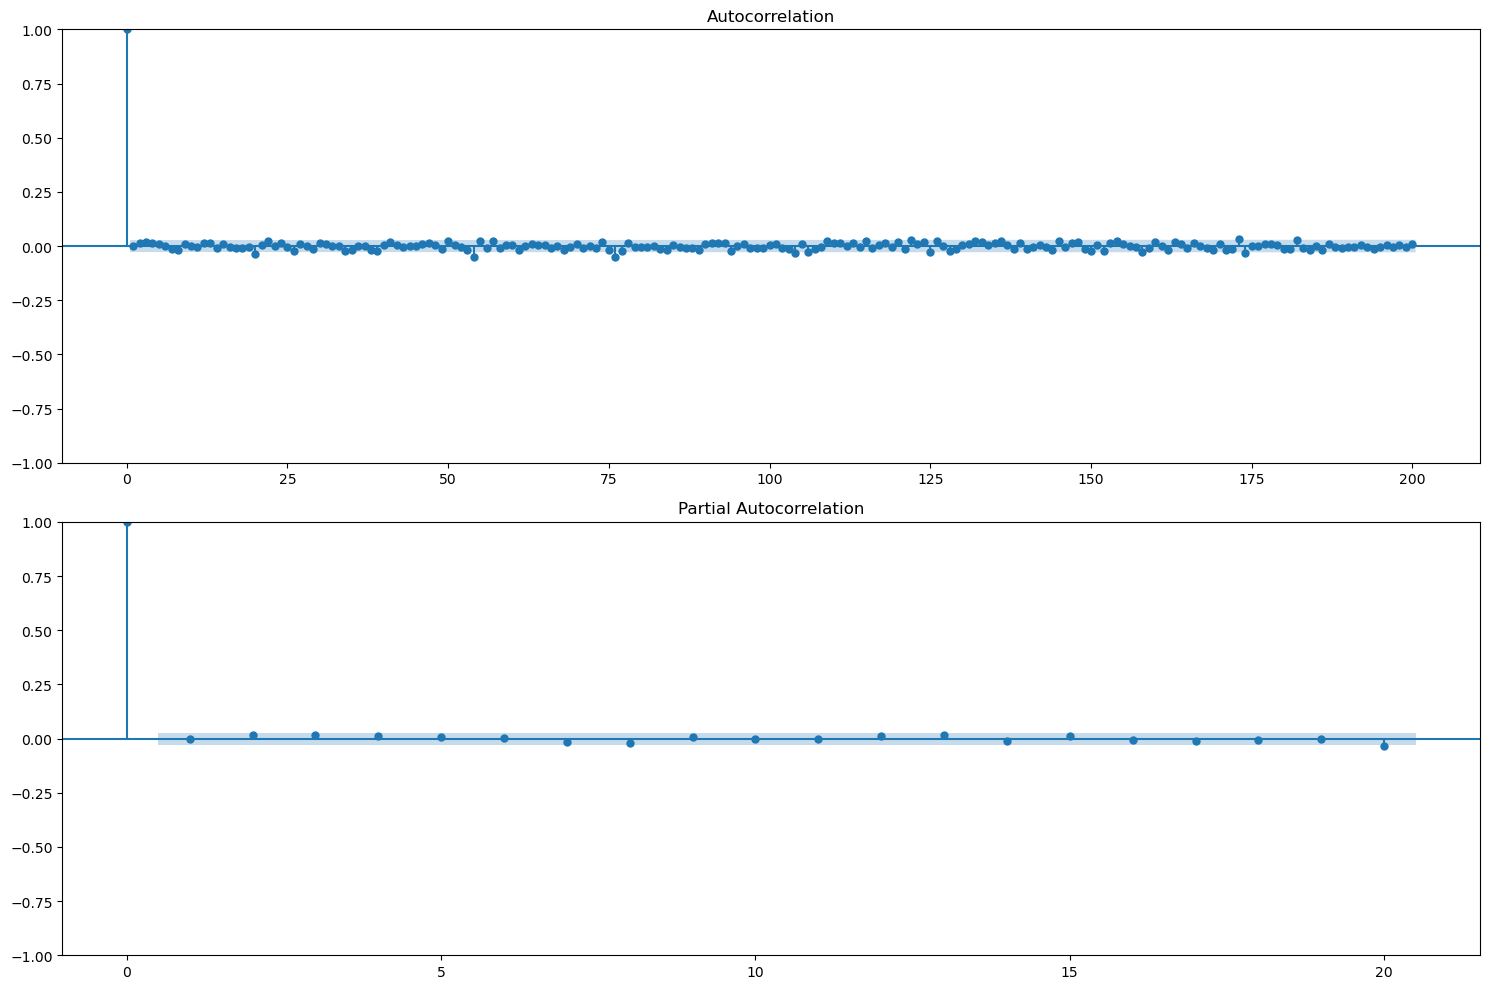

ADF Statistic: -70.70
p-value: 0.00
Stationary


In [35]:
dfr['Signal8_diff'] = dfr['Signal8'].diff().fillna(0)
check_autocorrelation(dfr, 'Signal8_diff')

# Asset

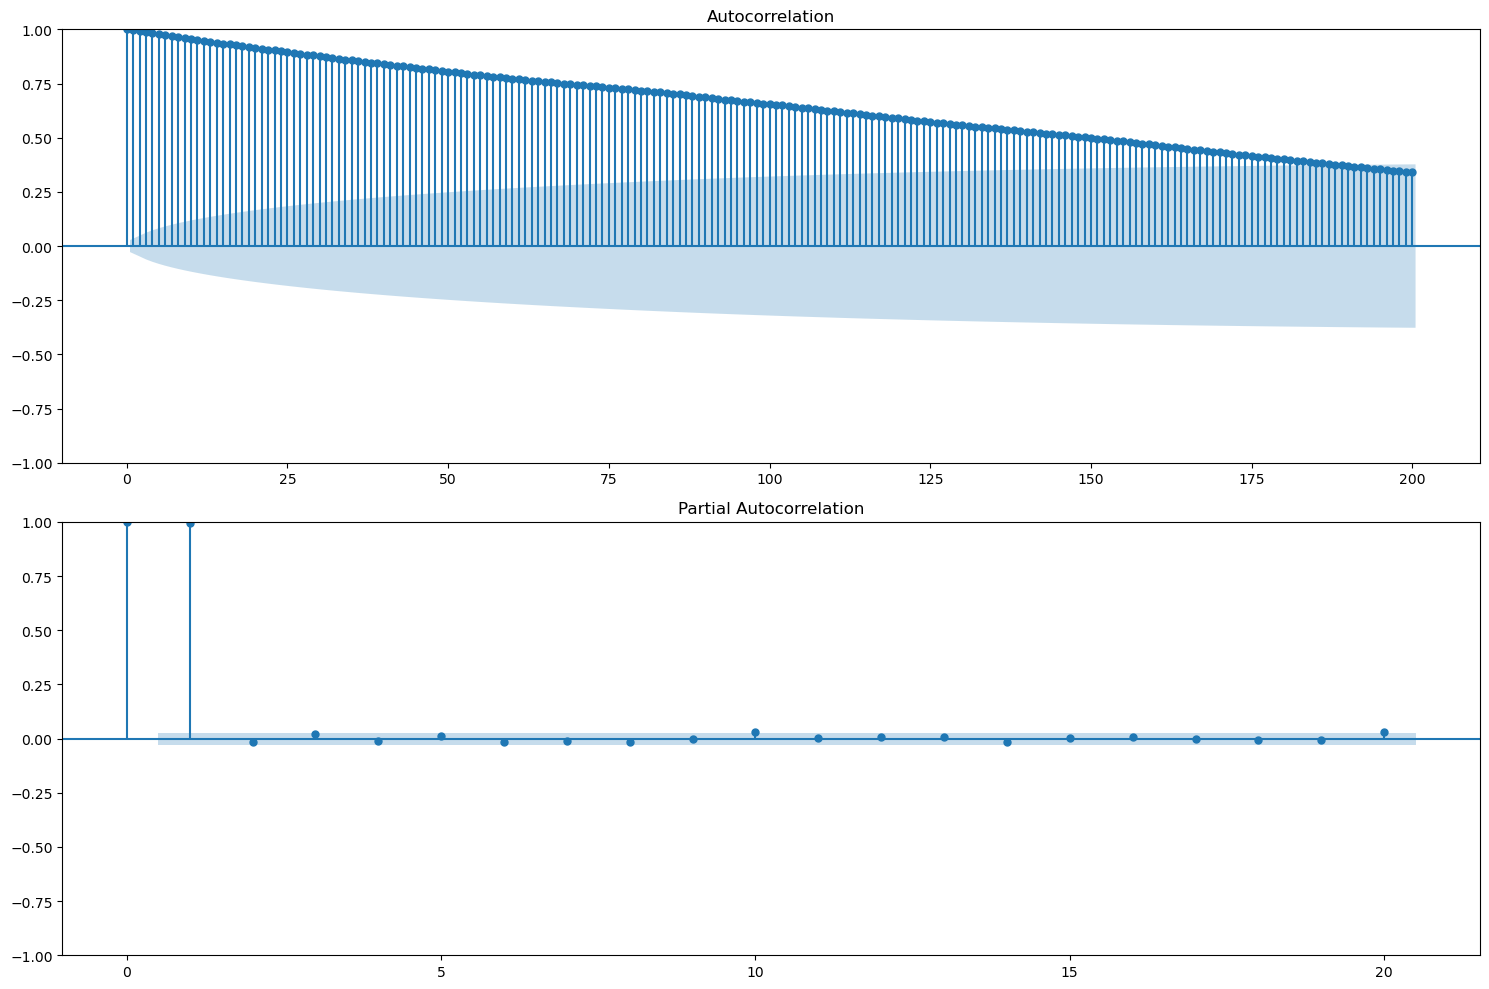

ADF Statistic: -3.78
p-value: 0.00
Stationary


In [36]:
check_autocorrelation(df, "Asset")

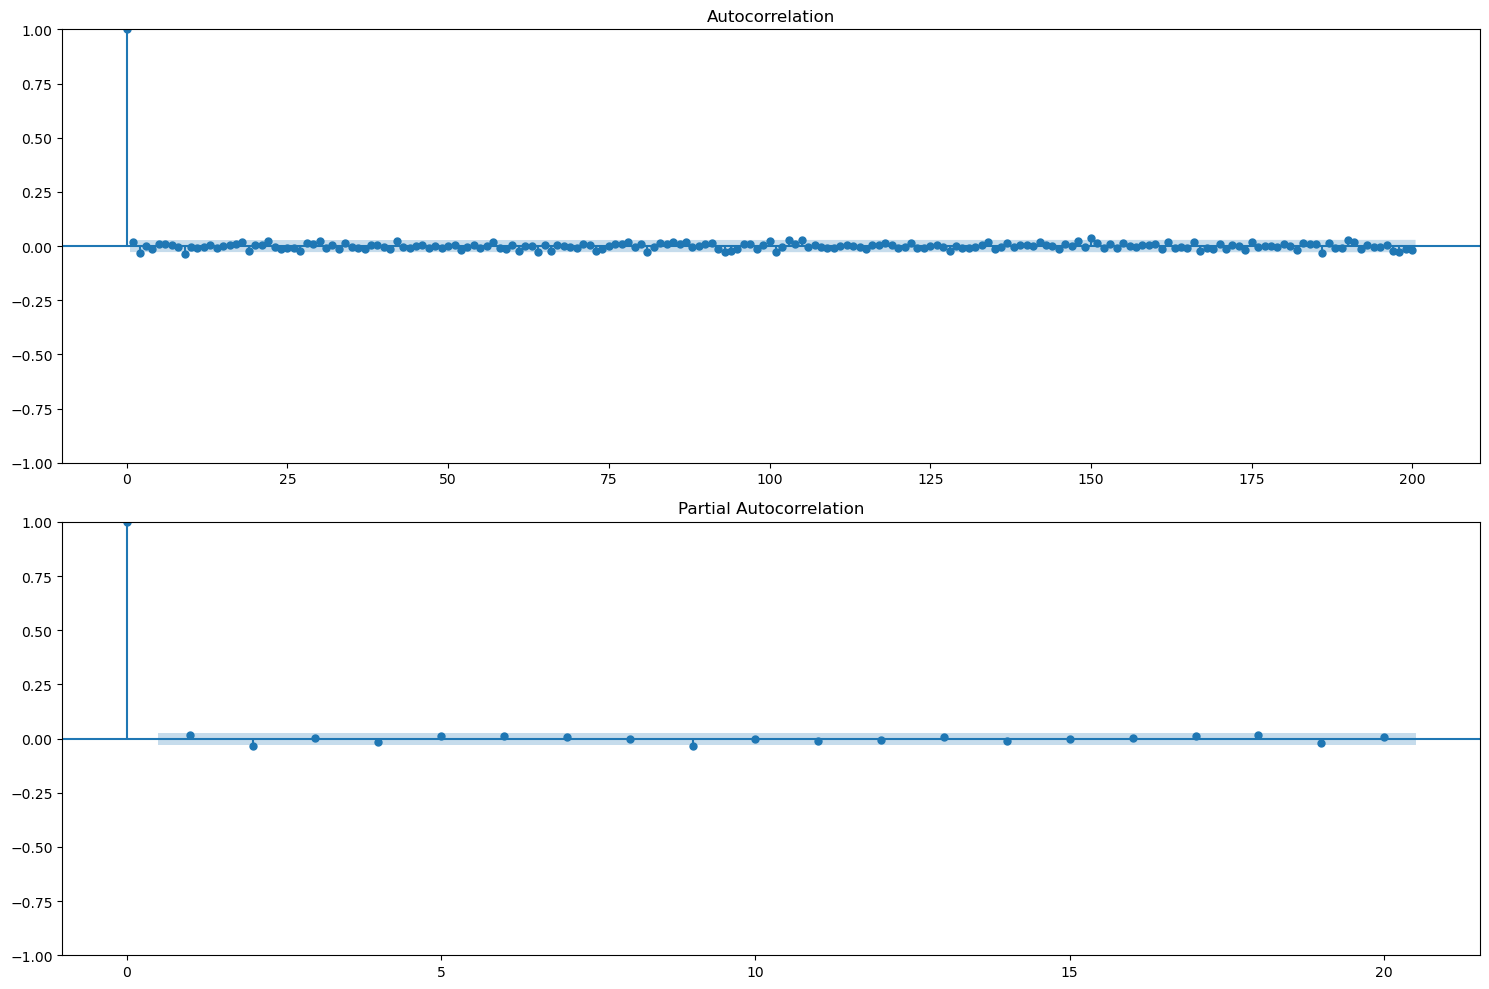

ADF Statistic: -51.13
p-value: 0.00
Stationary


In [37]:
dfr['Asset_diff'] = dfr['Asset'].diff().fillna(0)
check_autocorrelation(dfr, 'Asset_diff')

In summary, all features and outcome had autocorrelation and were non-stationary. I made the data stationary by applying differencing, which in turn removed all autocorrelation between the variables. We now move on to creating more lagged variables to predict the asset from the signals.

# Predicting asset from signals

In [38]:
diff_features = [f"Signal{i}_diff" for i in range(1, 9)]
diff_outcome = ["Asset_diff"]
df_diff = dfr[diff_features+diff_outcome]
df_diff.head()

Signal1_diff  Signal2_diff  Signal3_diff  Signal4_diff  \
Date                                                                 
2000-01-03      0.000000      0.000000      0.000000      0.000000   
2000-01-04    -15.005270    -15.195229    -26.516092    -10.823522   
2000-01-05     -8.997462     11.369965    -27.145547     -7.610674   
2000-01-06     25.191346     16.704902     58.345237     42.492603   
2000-01-07     -6.197307     -3.293729     12.769691     -1.268328   

            Signal5_diff  Signal6_diff  Signal7_diff  Signal8_diff  Asset_diff  
Date                                                                            
2000-01-03      0.000000      0.000000      0.000000      0.000000    0.000000  
2000-01-04     20.359597      8.129298    -27.100431     12.941478    1.764742  
2000-01-05      3.893880     20.960767     25.839863    -12.610457    2.008185  
2000-01-06     -1.045246     16.098338     18.732536    -16.773566   27.150705  
2000-01-07     16.476653      7.910663     -8.888286     16.053529    4.341296

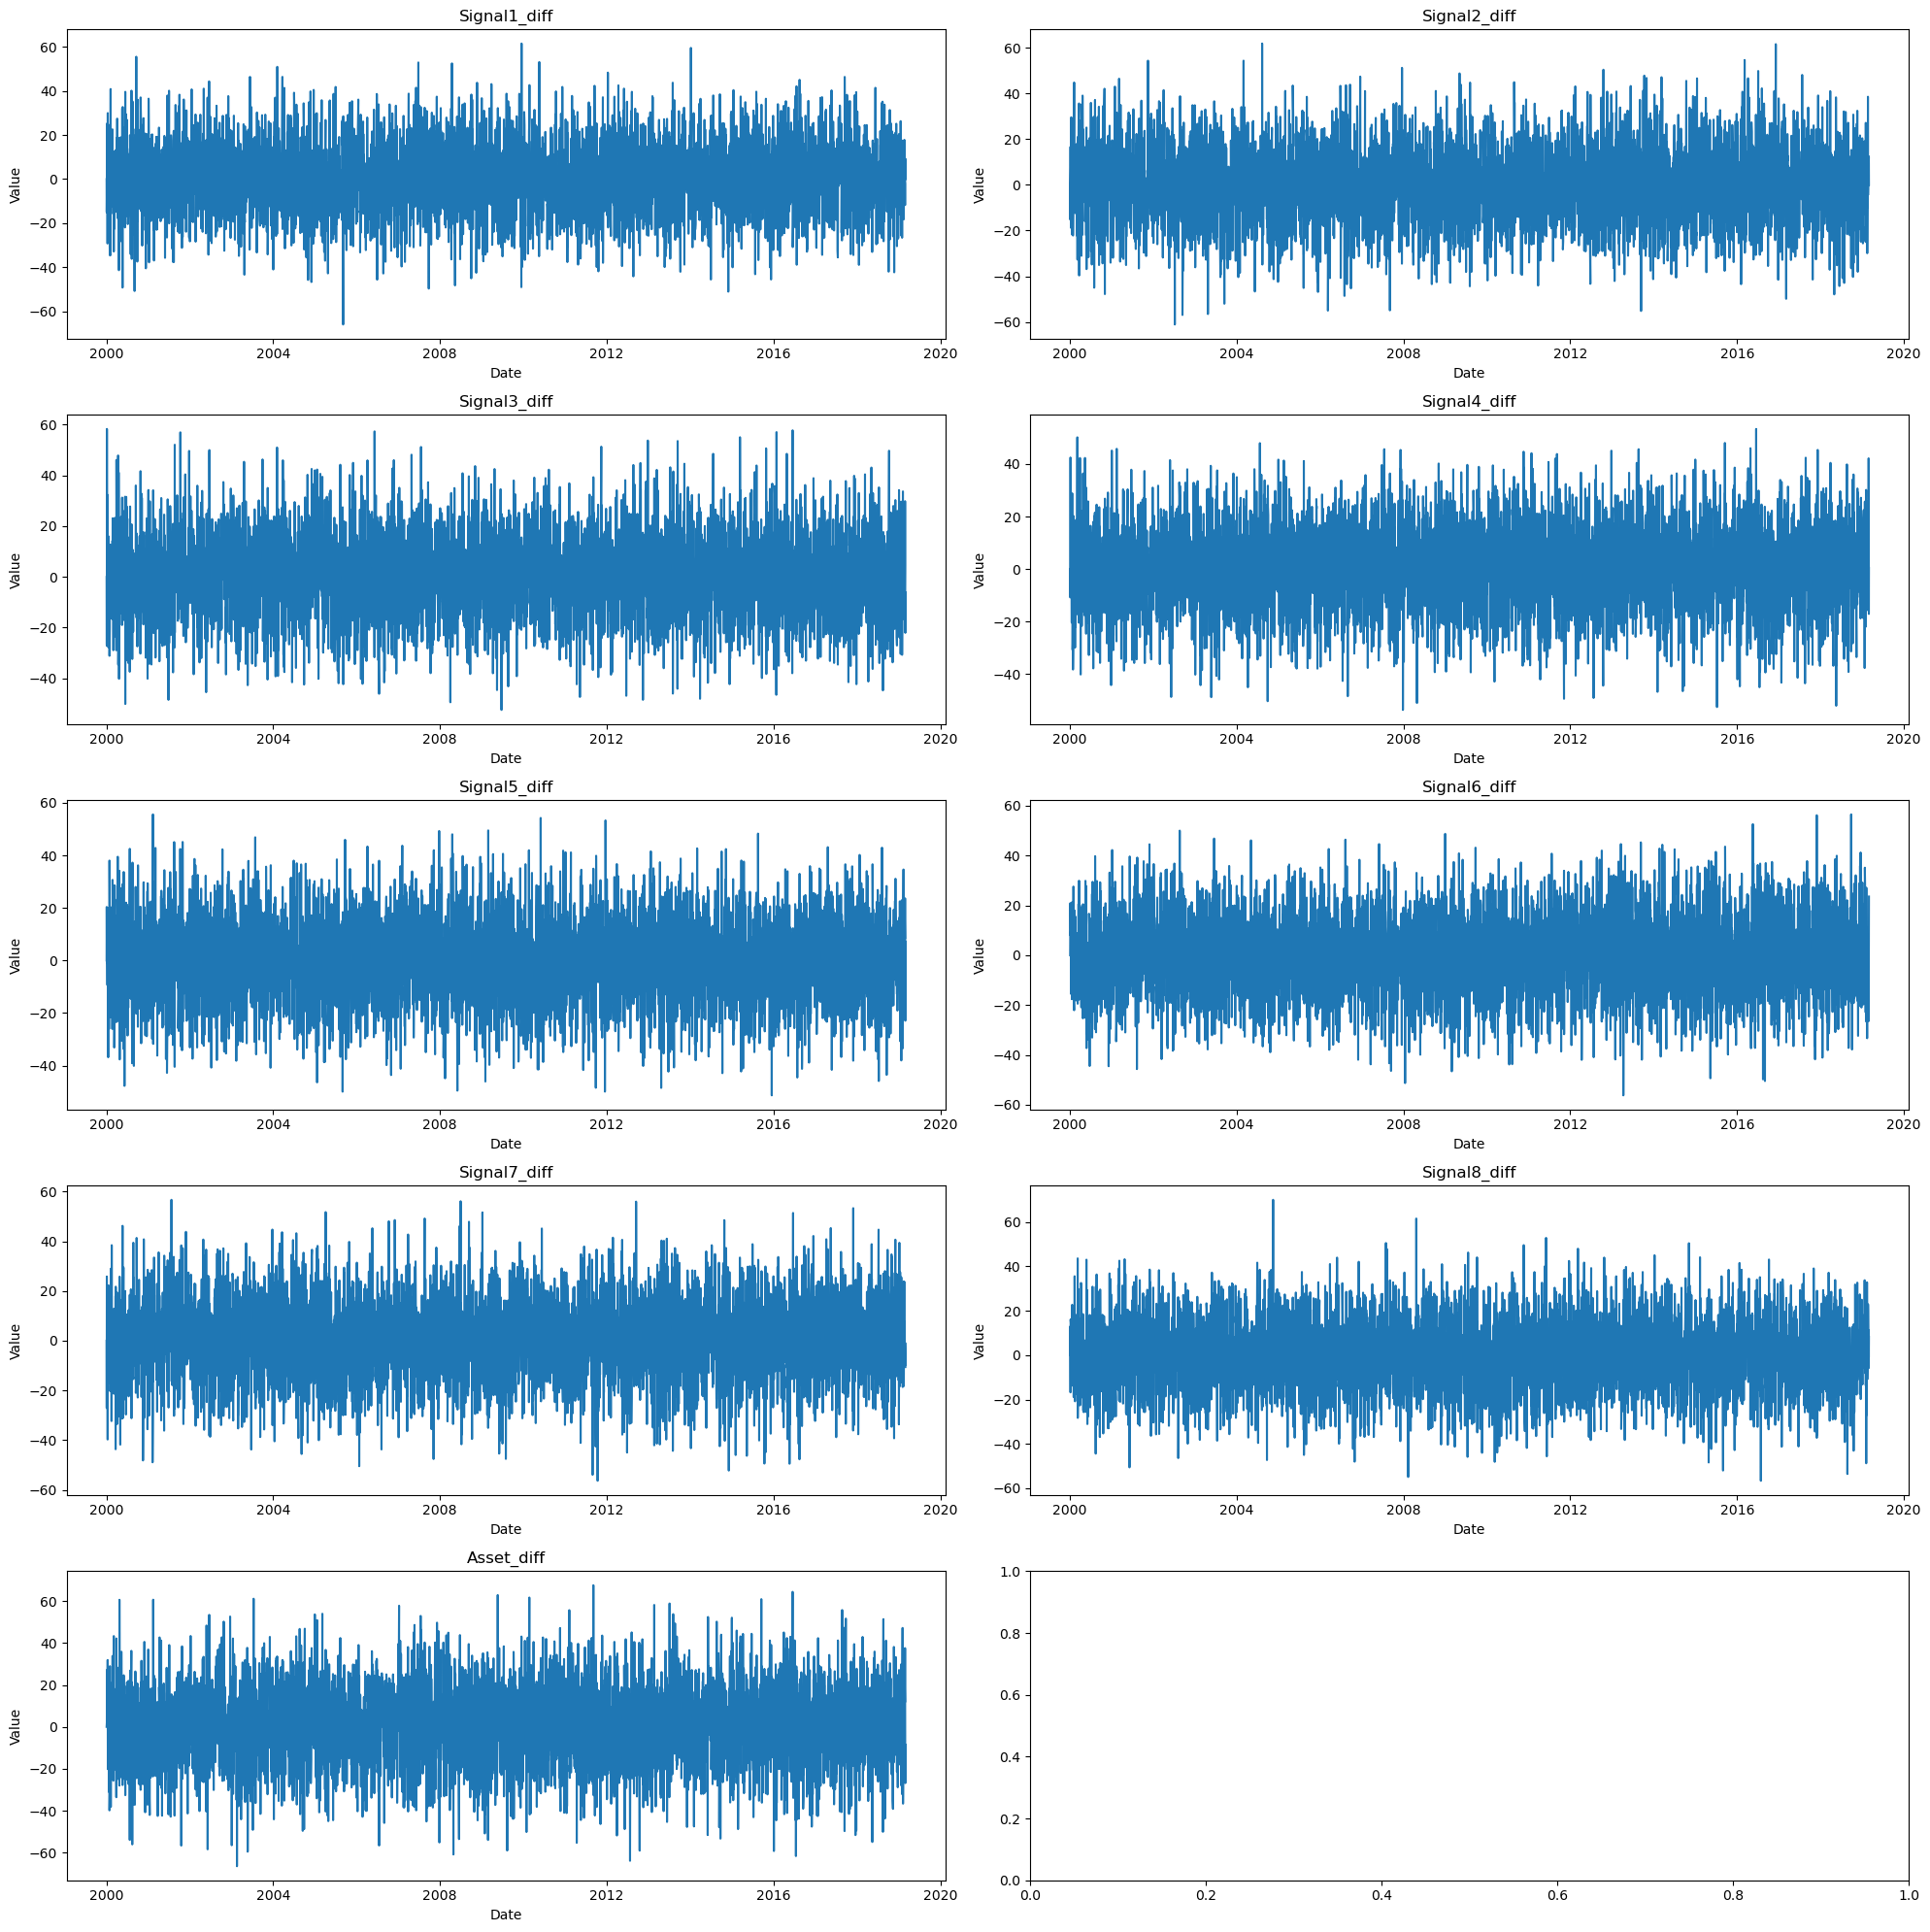

In [39]:
# Plot time series of new differenced variables
fig, ax = plt.subplots(5, 2, figsize=(20, 20))

for i in range(len(df_diff.columns)):
    x_pos = i % 2
    y_pos = int((i - x_pos) / 2)
    sns.lineplot(df_diff.iloc[:,i], ax=ax[y_pos, x_pos])
    ax[y_pos, x_pos].set_title(df_diff.columns[i])
    ax[y_pos, x_pos].set_ylabel("Value")
    
plt.tight_layout()
plt.show()

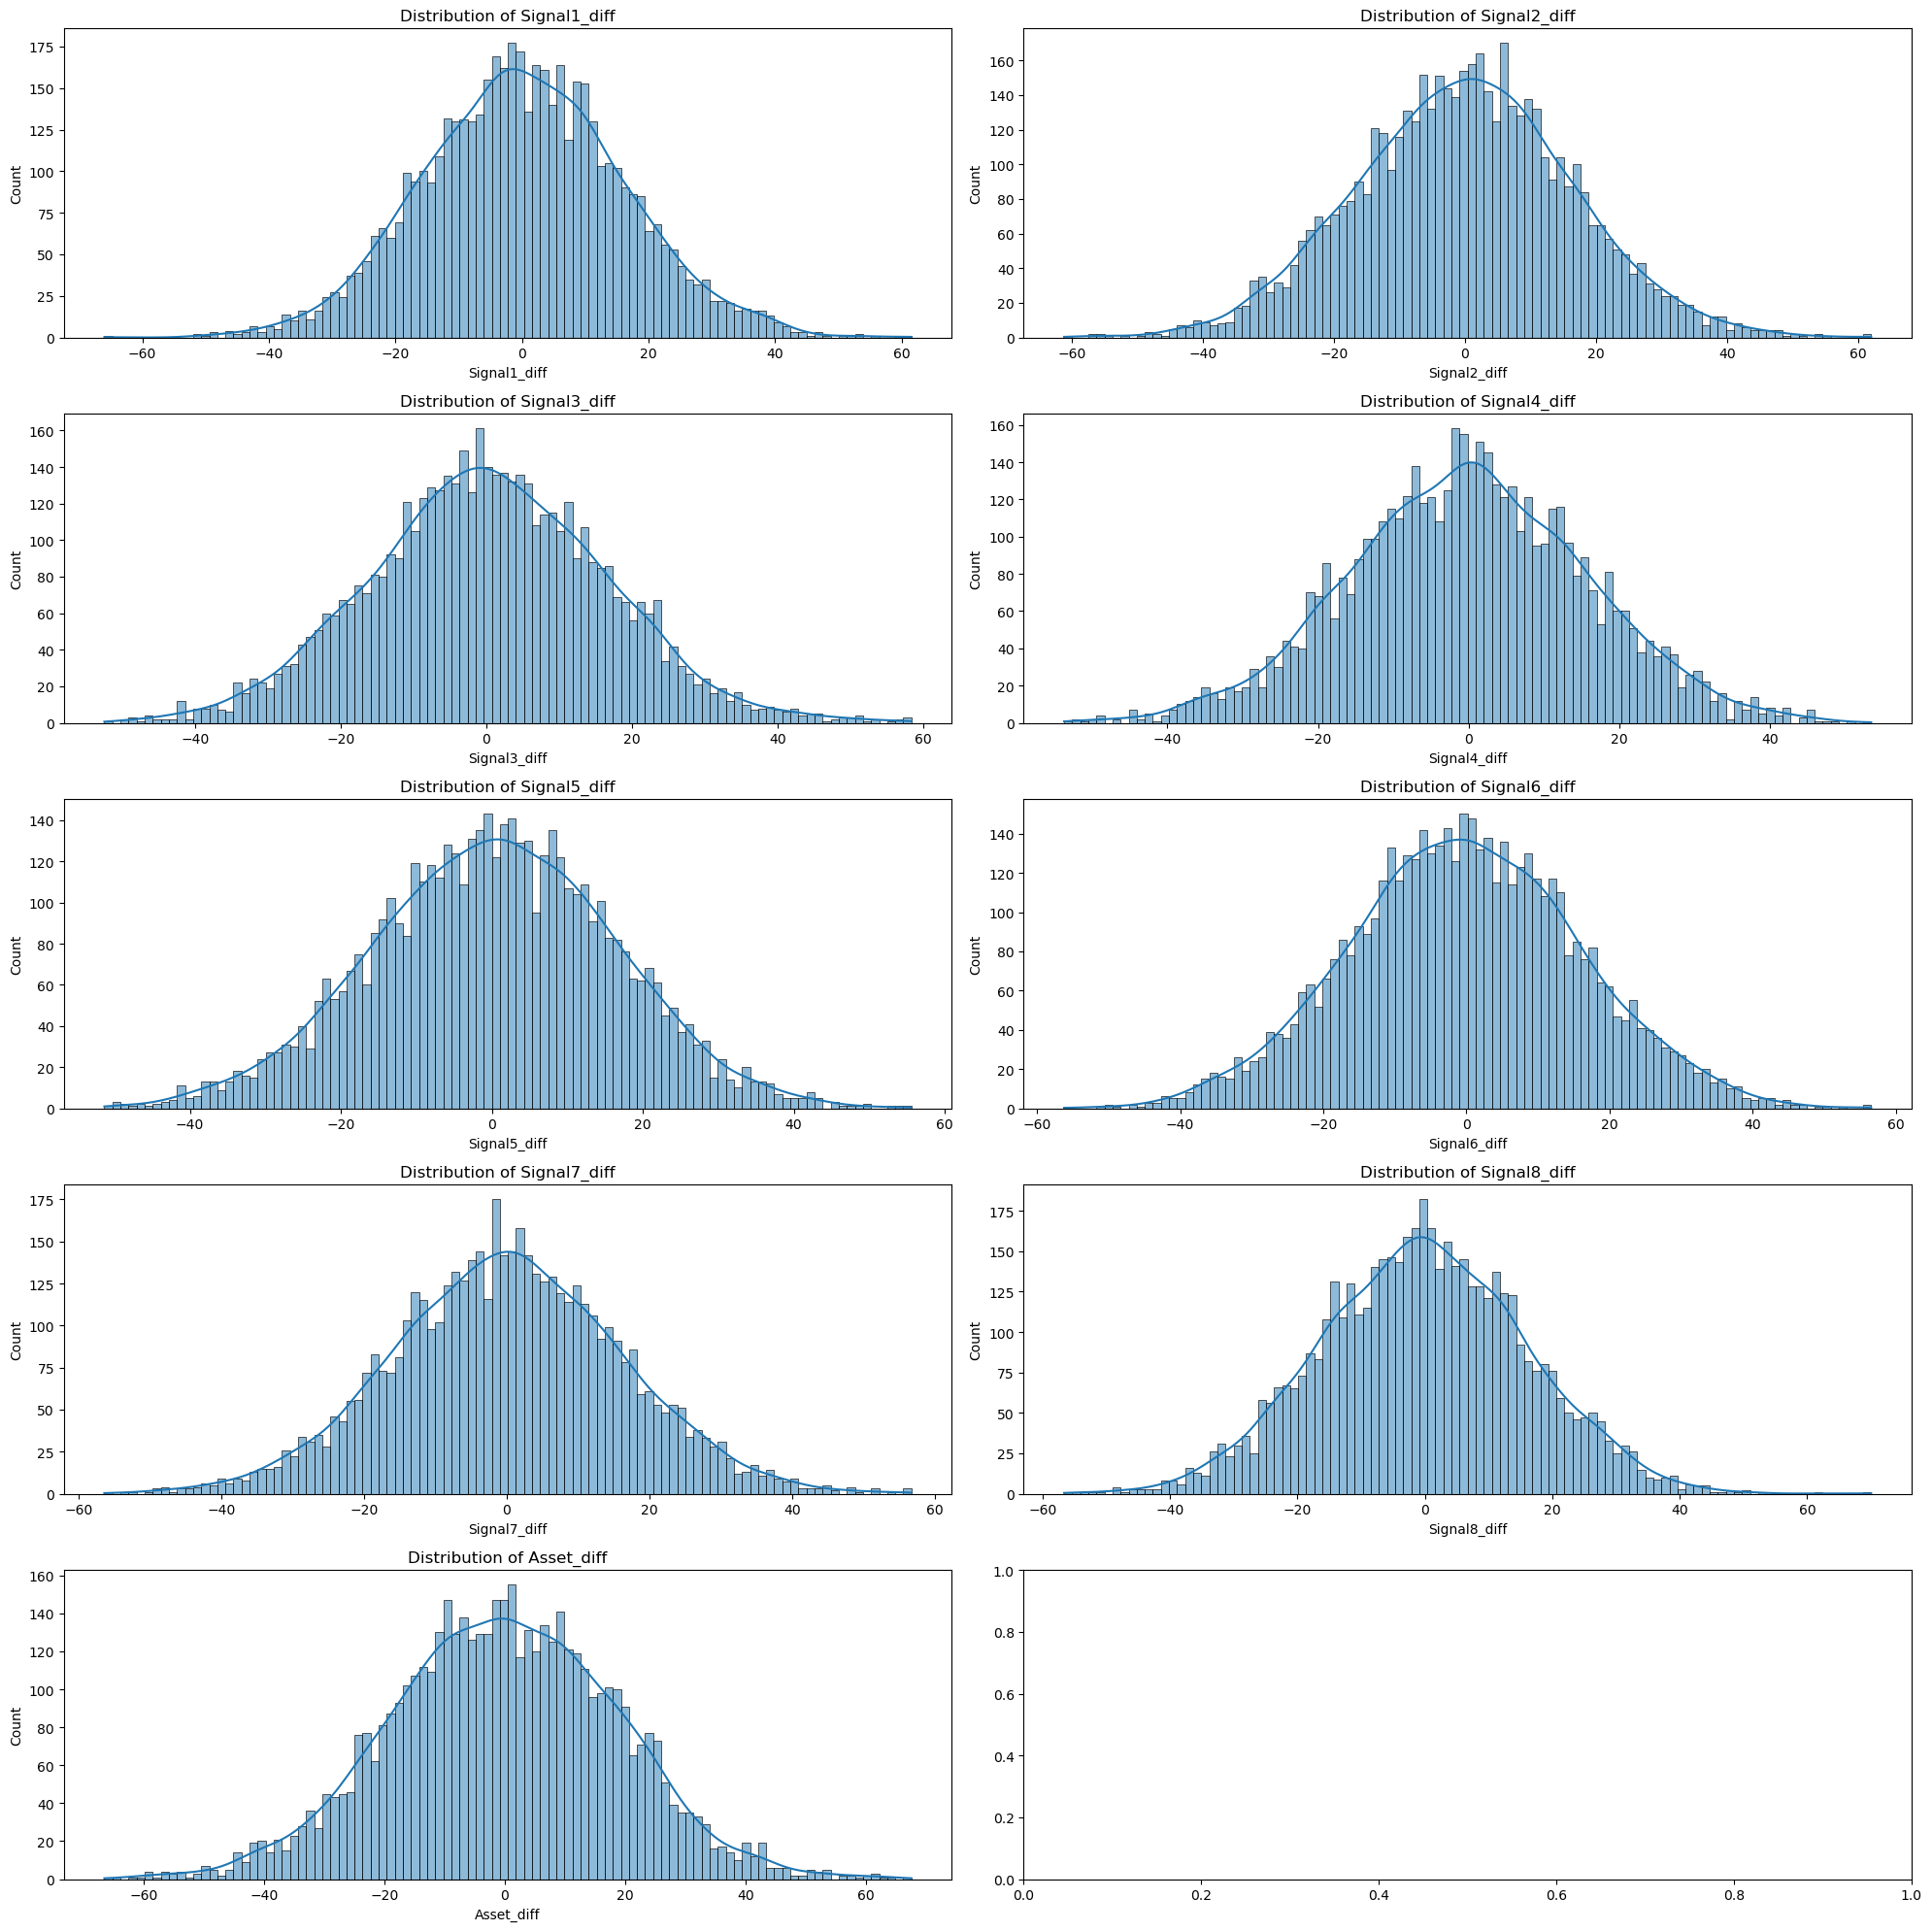

In [40]:
fig, ax = plt.subplots(5, 2, figsize=(20, 20))

for i in range(len(df_diff.columns)):
    x_pos = i % 2
    y_pos = int((i - x_pos) / 2)
    sns.histplot(df_diff[df_diff.columns[i]], ax=ax[y_pos, x_pos], kde=True, bins=100)
    
    ax[y_pos, x_pos].set_title(f"Distribution of {df_diff.columns[i]}")
    
plt.tight_layout()
plt.show()

These features look approximately normal. We can use the sharpiro wilks test to see fit they actually are. This will greatly help with the modeling for gradient descending models

In [41]:
from scipy import stats
for feature in (df_diff):
    statistic, p = stats.shapiro(df_diff[feature])
    print(feature)
    print(f"Shapiro Wilks Test statistic: {statistic}")
    print("p-val:", p)
    print("Looks normal" if p > 0.05 else "Not normal")
    print()

Signal1_diff
Shapiro Wilks Test statistic: 0.9995706677436829
p-val: 0.34568431973457336
Looks normal

Signal2_diff
Shapiro Wilks Test statistic: 0.9997219443321228
p-val: 0.7712726593017578
Looks normal

Signal3_diff
Shapiro Wilks Test statistic: 0.999016284942627
p-val: 0.005050754640251398
Not normal

Signal4_diff
Shapiro Wilks Test statistic: 0.9995899796485901
p-val: 0.39125856757164
Looks normal

Signal5_diff
Shapiro Wilks Test statistic: 0.999608039855957
p-val: 0.4372718334197998
Looks normal

Signal6_diff
Shapiro Wilks Test statistic: 0.9997038841247559
p-val: 0.7182334661483765
Looks normal

Signal7_diff
Shapiro Wilks Test statistic: 0.9997193813323975
p-val: 0.7638292908668518
Looks normal

Signal8_diff
Shapiro Wilks Test statistic: 0.9997360706329346
p-val: 0.8104561567306519
Looks normal

Asset_diff
Shapiro Wilks Test statistic: 0.9994906783103943
p-val: 0.19900089502334595
Looks normal



Looks like signal3 is not normal, we can change this using different transformations such as sqrt but this may change the scale of the data. Let's see the descriptive statistics of the data first before deciding.

In [42]:
df_diff.describe()

Signal1_diff  Signal2_diff  Signal3_diff  Signal4_diff  Signal5_diff  \
count   5000.000000   5000.000000   5000.000000   5000.000000   5000.000000   
mean       0.286351     -0.128207      0.245516     -0.149312      0.238282   
std       15.915303     16.528985     16.297059     15.886736     16.071528   
min      -66.001802    -61.149738    -52.452192    -53.702125    -51.334665   
25%      -10.600806    -11.334703    -10.462014    -10.772436    -10.454164   
50%       -0.038961      0.075346     -0.043659     -0.197483      0.405407   
75%       10.675527     10.669151     11.089550     10.679226     11.323936   
max       61.557026     61.954103     58.345237     53.385749     55.595118   

       Signal6_diff  Signal7_diff  Signal8_diff   Asset_diff  
count   5000.000000   5000.000000   5000.000000  5000.000000  
mean      -0.252311      0.088090     -0.228338    -0.127267  
std       16.065495     16.097882     16.156112    18.888364  
min      -56.205958    -56.378156    -56.625120   -66.495151  
25%      -10.988365    -10.820000    -11.325352   -12.790428  
50%       -0.307454      0.045296     -0.253488    -0.161737  
75%       10.606238     10.828820     10.854444    12.719366  
max       56.566972     56.708009     70.047991    67.589878

For the most part, each of the variables have means centered around zero and std of 15-17. This is good enough for model training.

Let's see if there are any correlations with the data. Since we are working with time-series, we have to calculate lagged correlations.

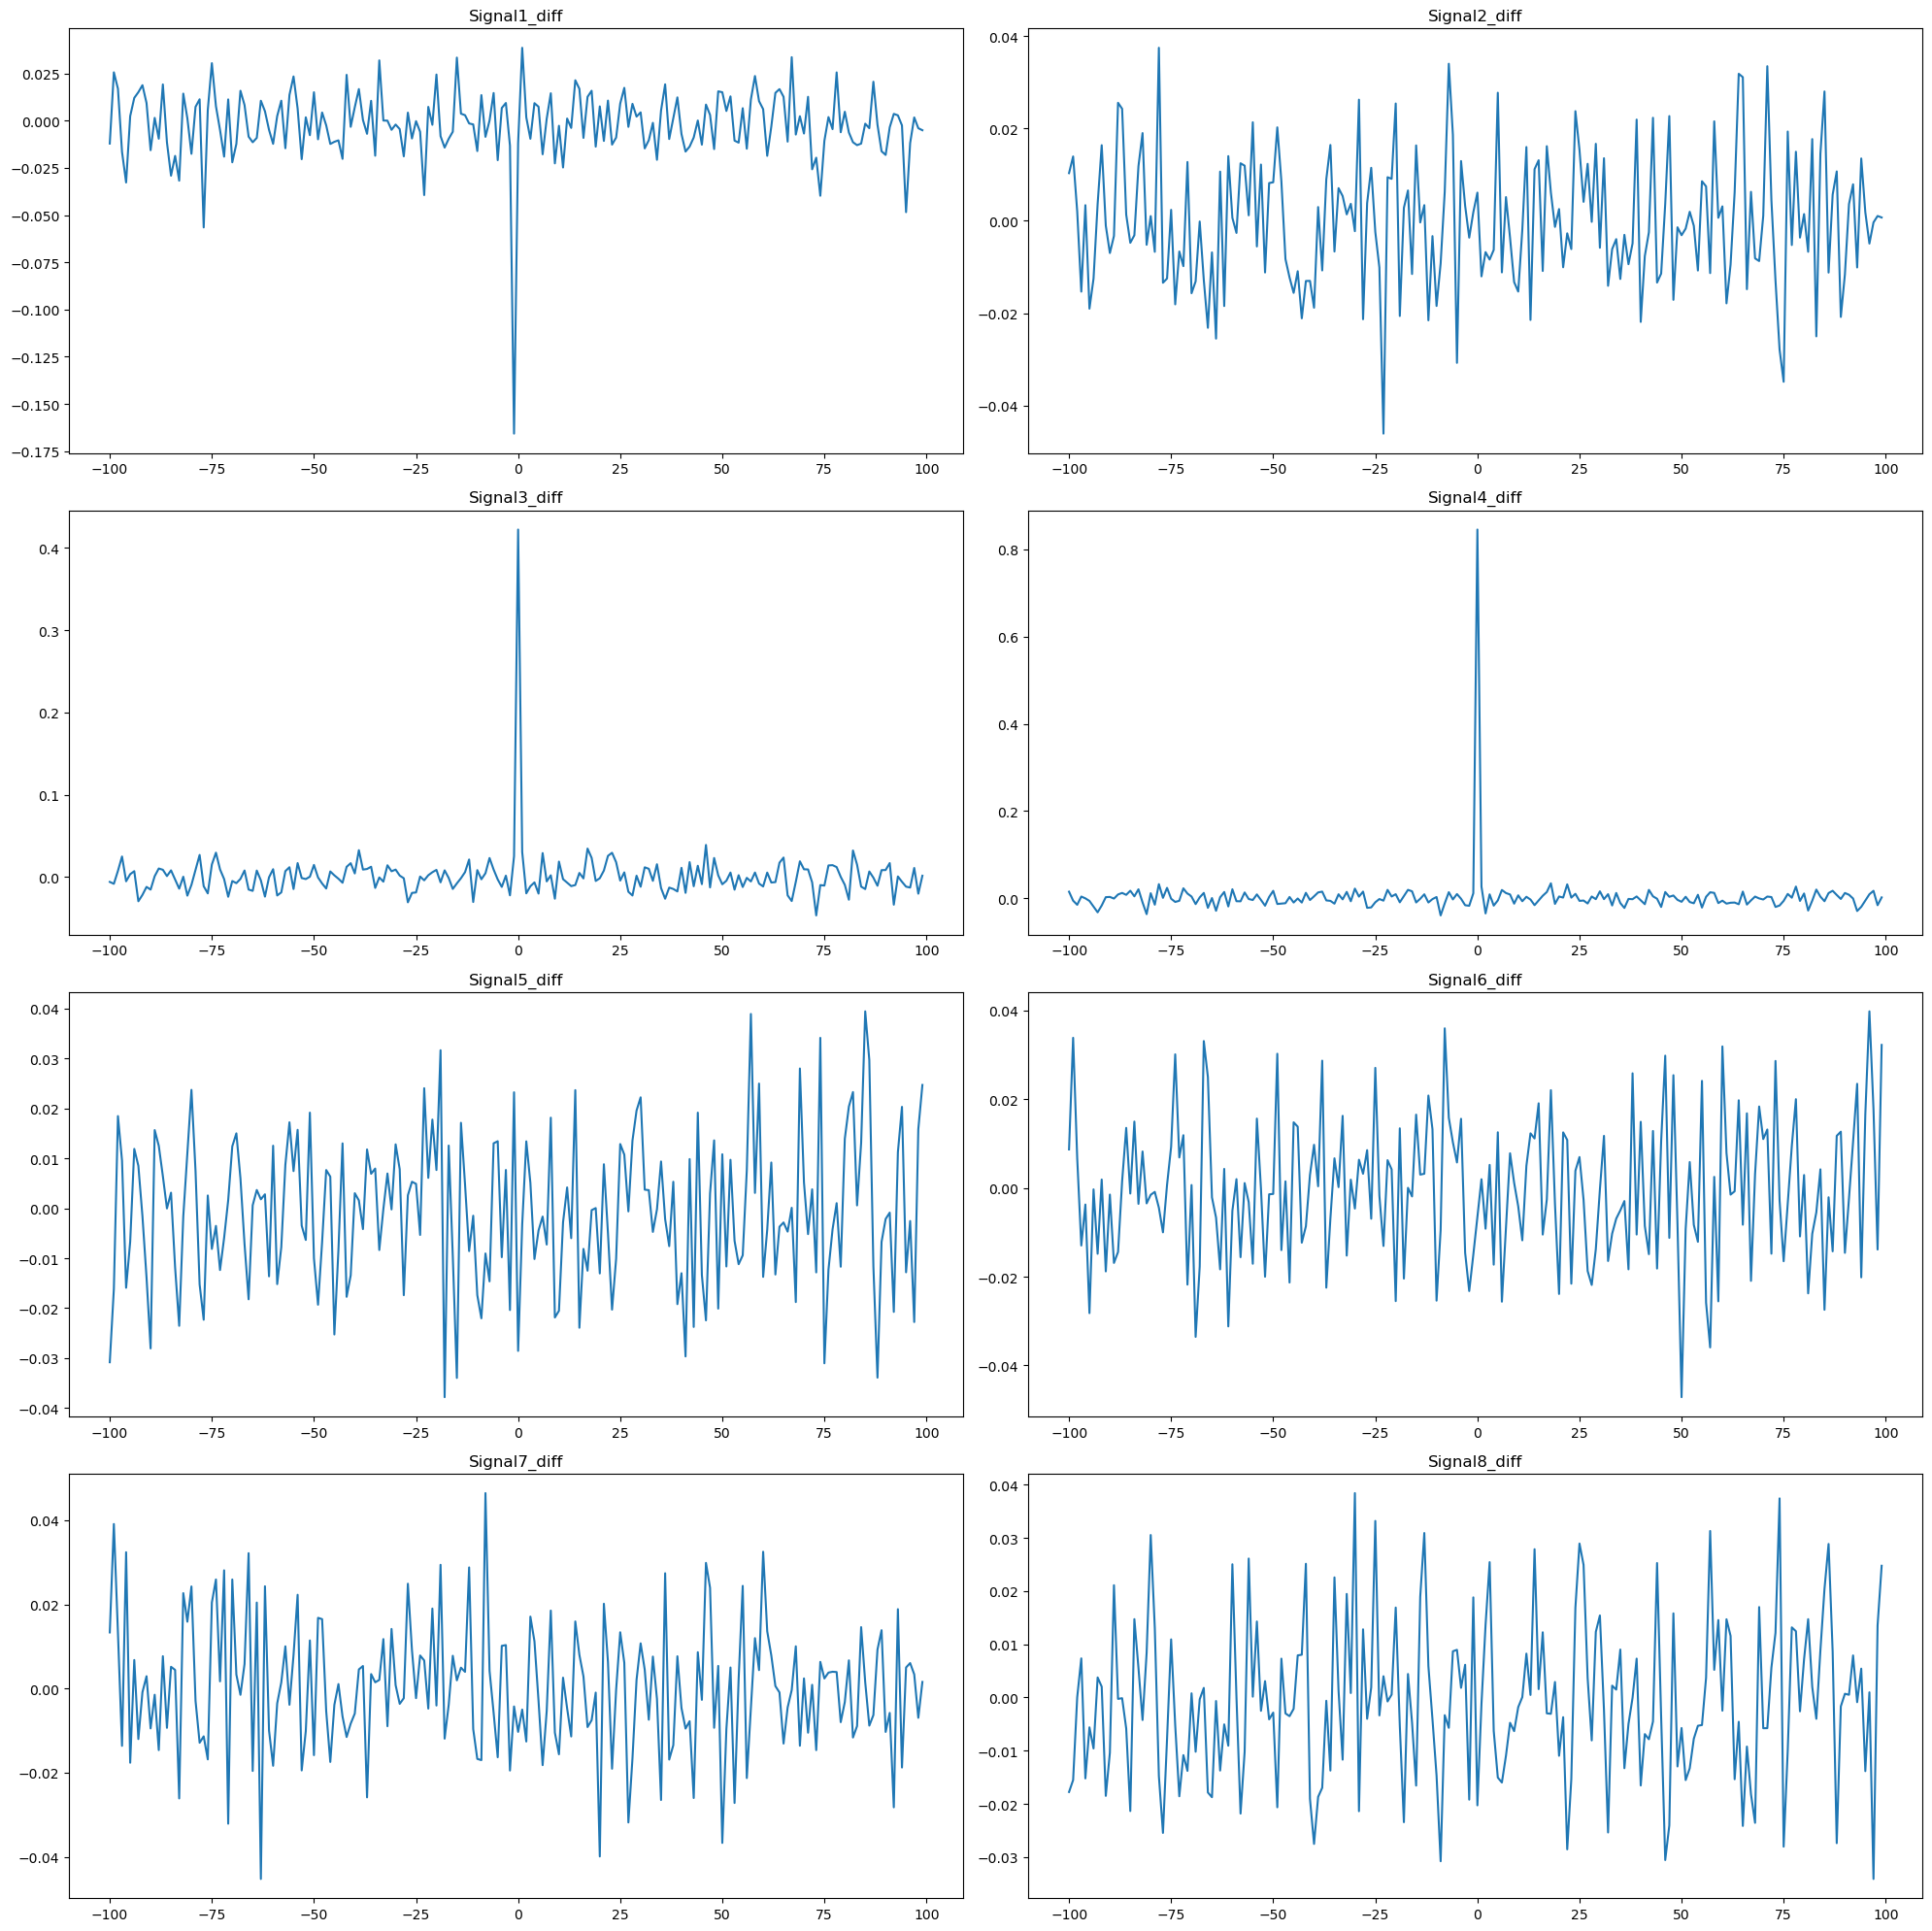

In [43]:
def compute_lagged_correlation(data, outcome, feature, lag):
    x = data[outcome].shift(lag)
    return x.corr(data[feature])

lag = list(range(-100, 100, 1))

fig, ax = plt.subplots(4, 2, figsize=(20, 20))

for i in range(len(diff_features)):
    x_pos = i % 2
    y_pos = int((i - x_pos) / 2)
    lagged_correlation = pd.Series([compute_lagged_correlation(df_diff, "Asset_diff", diff_features[i], lag) for lag in lag], index=lag)
    sns.lineplot(lagged_correlation, ax=ax[y_pos, x_pos])
    ax[y_pos, x_pos].set_title(diff_features[i])
    
plt.tight_layout()
plt.show()

Signals 1, 3, 4 exhibited interesting correlations unlike the other signals, which mostly centered around zero. Let's look into which lags had the strongest correlations with Asset by looking at smaller lags

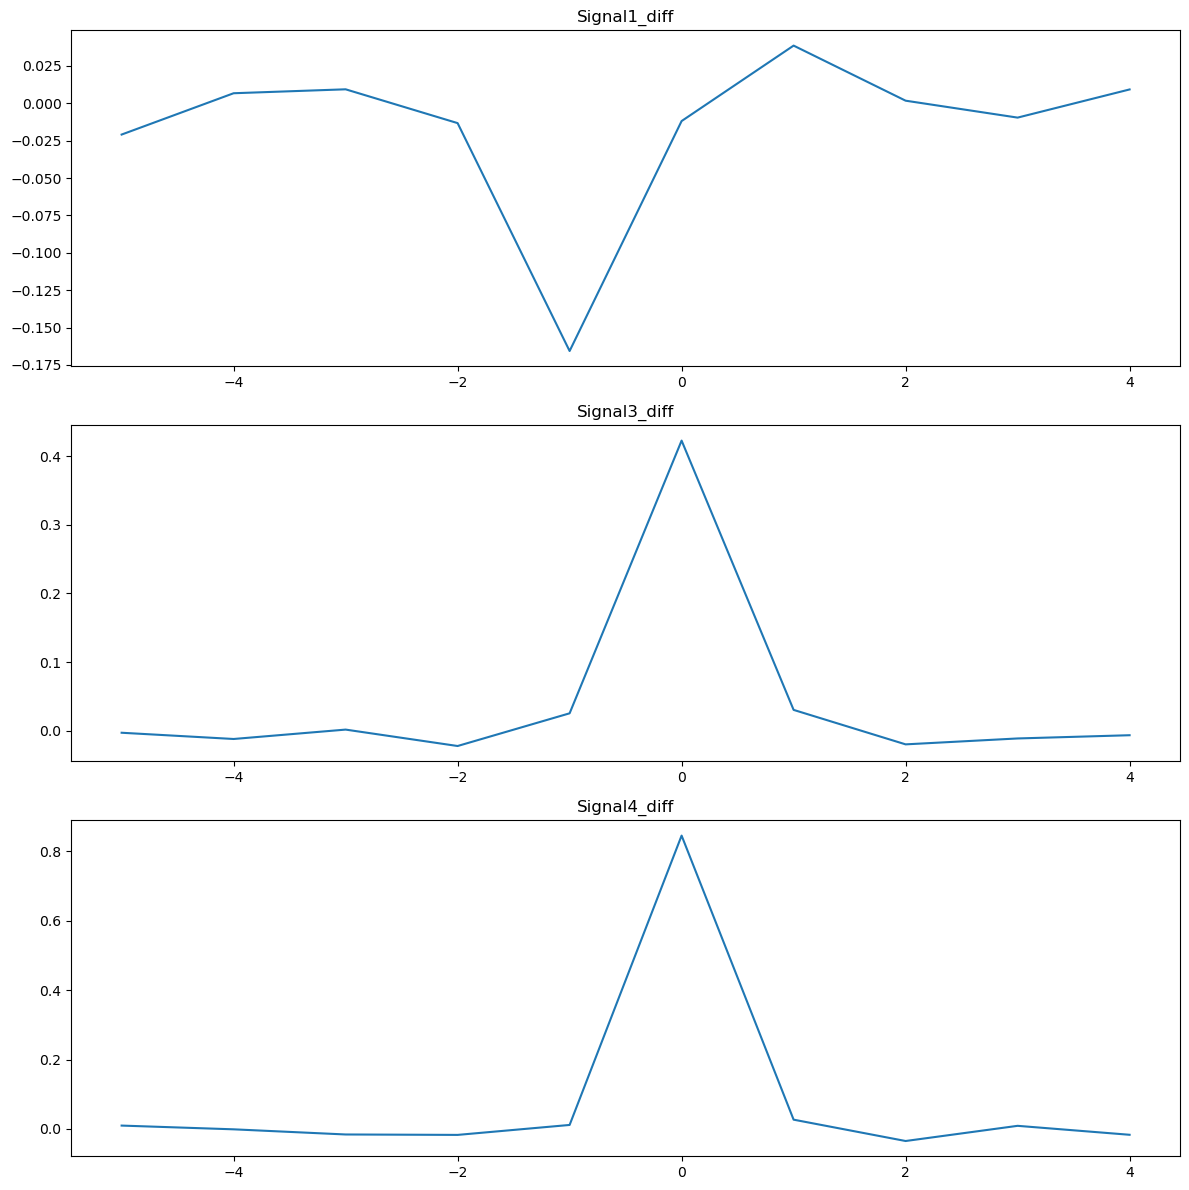

In [44]:
interesting_features = ["Signal1_diff", "Signal3_diff", "Signal4_diff"]
fig, ax = plt.subplots(3, 1, figsize=(12, 12))
lag = list(range(-5, 5, 1))
for i in range(3):
    lagged_correlation = pd.Series([compute_lagged_correlation(df_diff, "Asset_diff", interesting_features[i], lag) for lag in lag], index=lag)
    sns.lineplot(lagged_correlation, ax=ax[i])
    ax[i].set_title(interesting_features[i])
plt.tight_layout()
plt.show()

We get the following correlations:
1) Signal1 has a negative correlation of -0.175 with Asset when predicing Asset one day into the future.
2) Signal3 and Signal4 have positive correlations of 0.4 and 0.8 with Asset on the same day with no lag. 

Signal1 is most interesting because it offers some predictive value into the future, although the correlations of Signal3 and Signal4 can be useful.

We want to see which variables to use when fitting our model. This means we should look into only using variables that are not colinear. We can check this by fitting an OLS model and checking the coefficients.

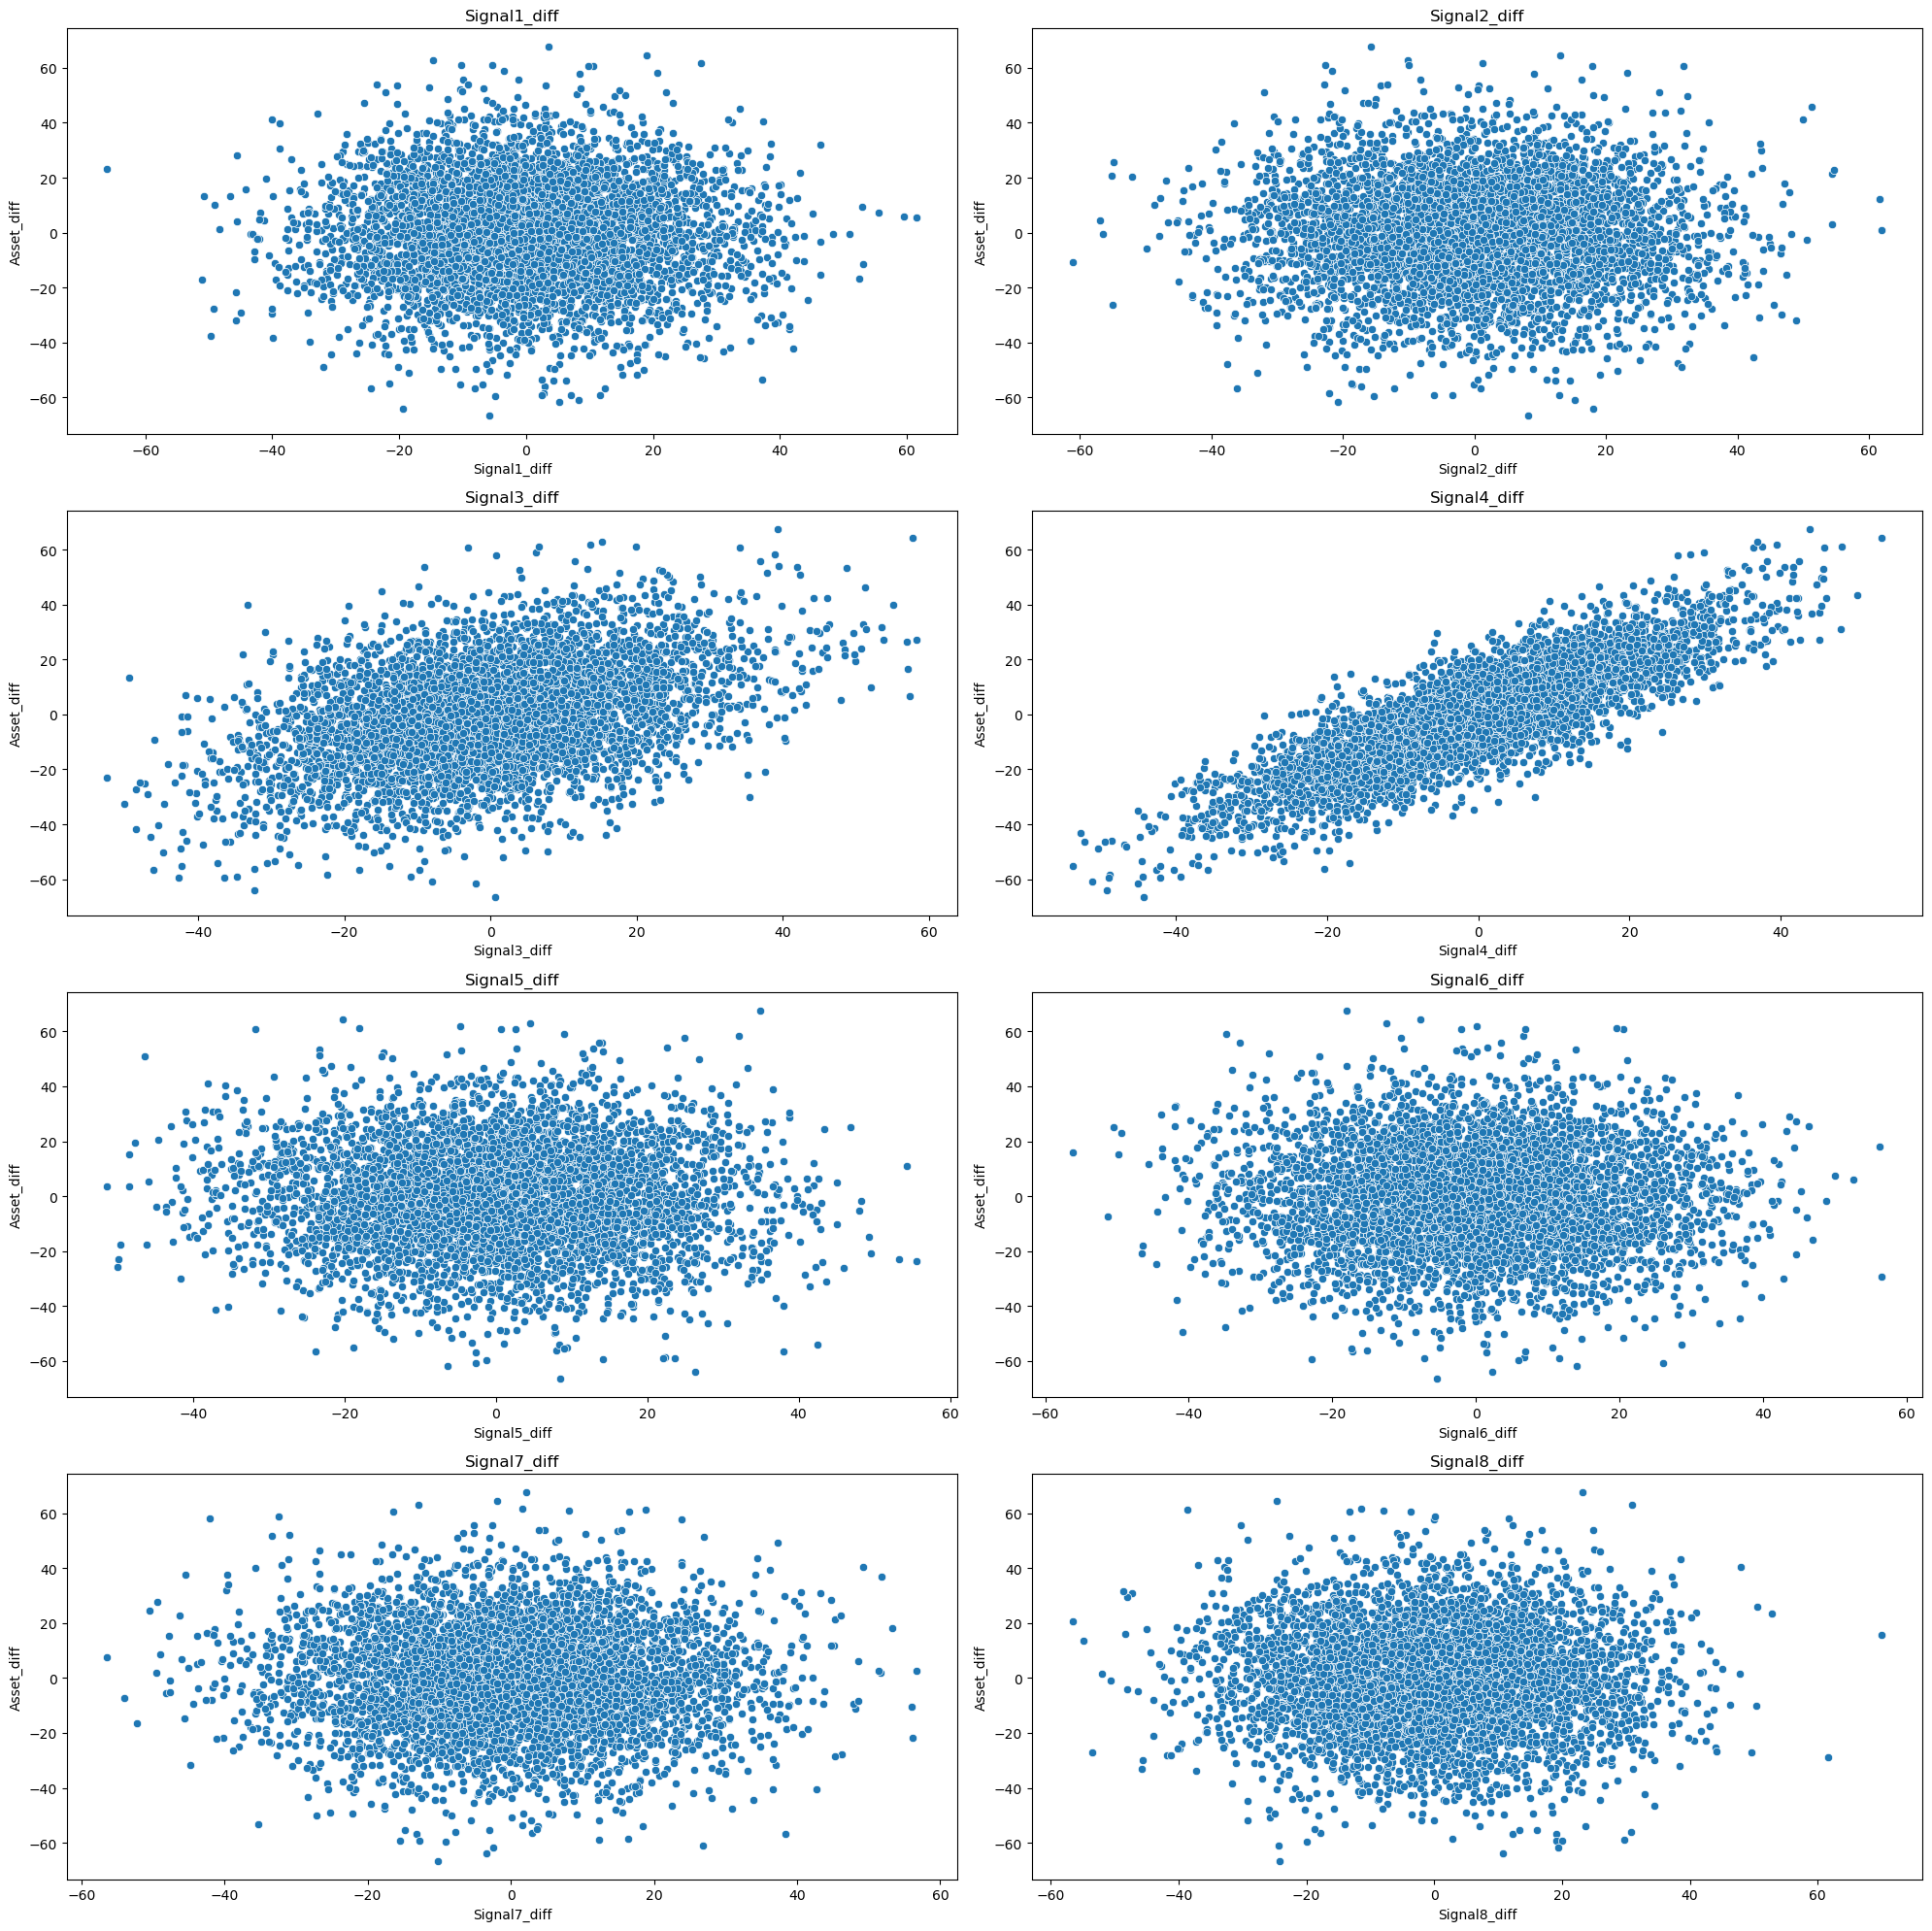

In [45]:
# Graphing relationship between features and asset to see if we can model with pca
fig, ax = plt.subplots(4, 2, figsize=(20, 20))

for i in range(len(diff_features)):
    x_pos = i % 2
    y_pos = int((i - x_pos) / 2)
    sns.scatterplot(df_diff, x=diff_features[i], y="Asset_diff", ax=ax[y_pos, x_pos])
    ax[y_pos, x_pos].set_title(diff_features[i])
    
plt.tight_layout()
plt.show()

Besides signal4 and maybe signal3, the other variables do not exhibit a linear relationship with Asset. Thus the assumptions of PCA will not be satisfied here. 

<Axes: xlabel='Signal1_diff', ylabel='Asset_diff'>

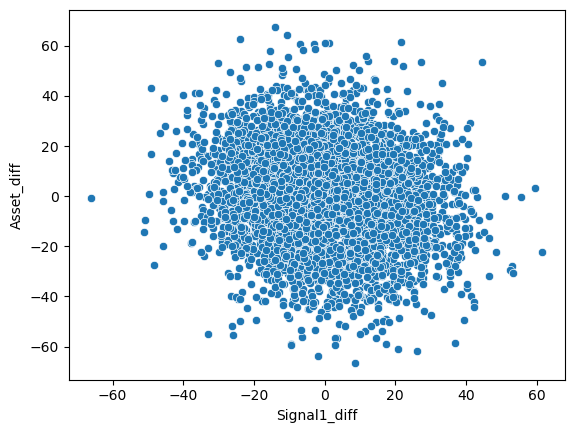

In [90]:
sns.scatterplot(x=df_diff["Signal1_diff"].shift(1), y=df_diff["Asset_diff"])

We do indeed see a weak negative correlation between Signal1 shifted forwards by one day and Asset

In [46]:
# from statsmodels.tsa.stattools import ccf
# fig, ax = plt.subplots(4, 2, figsize=(20, 20))

# for i in range(len(diff_features)):
#     x_pos = i % 2
#     y_pos = int((i - x_pos) / 2)
#     cross_corr = ccf(df_diff[diff_features[i]], df_diff.Asset_diff, adjusted=False)
#     sns.lineplot(cross_corr, ax= ax[y_pos, x_pos])
#     ax[y_pos, x_pos].set_title(f"Cross-corr Asset w/ {diff_features[i]}")
    
# plt.tight_layout()
# plt.show()


# Shows similar results to the lagged correlation

In [58]:
# OLS model
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
formula = "Asset_diff ~ " + "+".join(diff_features)

df_diff2 = df_diff.iloc[1:,]
# df_diff2 = df_diff2.reset_index(drop=True)
# Since I differenced the data to make it stationary, I should shift the Asset_diff variable
# up one row so that I am trying to predict the difference in tmrw's Asset price from today

df_diff2["Asset_diff_shift"] = df_diff2["Asset_diff"].shift(-1)
df_diff2 = df_diff2.dropna()
train_data = df_diff2[:-500] 
test_data = df_diff2[-500:]
X_train = train_data[diff_features].values
y_train = train_data["Asset_diff_shift"].values
# X_test = test_data[diff_features].values
# y_test = test_data["Asset_diff"].values



/var/folders/yw/mc7qyqyn5cd788q903jfp8_w0000gn/T/ipykernel_2125/1023642020.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff2["Asset_diff_shift"] = df_diff2["Asset_diff"].shift(-1)


In [59]:
print(train_data.shape)
print(test_data.shape)

(4498, 10)
(500, 10)


In [60]:
model = smf.ols(formula=formula, data=train_data).fit()

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Asset_diff   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     1449.
Date:                Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:02:00   Log-Likelihood:                -16730.
No. Observations:                4498   AIC:                         3.348e+04
Df Residuals:                    4489   BIC:                         3.354e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0123      0.149      0.082      0.935      -0.280       0.305
Signal1_diff    -0.0084      0.010     -0.819      0.413      -0.028       0.012
Signal2_diff     0.0044      0.010      0.448      0.654      -0.015       0.024
Signal3_diff     0.0001      0.011      0.013      0.990      -0.021       0.021
Signal4_diff     1.0094      0.011     92.406      0.000       0.988       1.031
Signal5_diff    -0.0160      0.011     -1.431      0.152      -0.038       0.006
Signal6_diff    -0.0129      0.010     -1.233      0.218      -0.033       0.008
Signal7_diff    -0.0032      0.010     -0.320      0.749      -0.023       0.017
Signal8_diff     0.0006      0.011      0.051      0.959      -0.021       0.022
==============================================================================
Omnibus:                        7.479   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                8.109
Skew:                          -0.054   Prob(JB):                       0.0173
Kurtosis:                       3.177   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here it is possible that there is some multicolinearity involved, seeing as some of the t statistics are very close to zero and the confidence itnervals for the coeffricients are wide.

In [62]:
predicted = model.predict(test_data)
y_pred = pd.DataFrame({"pred": predicted, "pred_lag1": predicted.shift(-1)}, index=test_data.index)

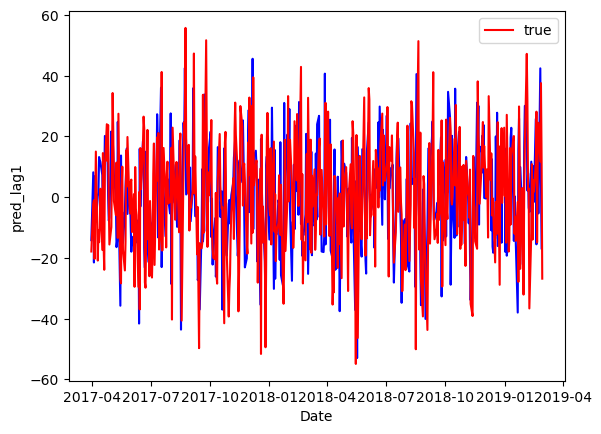

In [63]:
sns.lineplot(y_pred.pred_lag1, color="blue");
sns.lineplot(test_data.Asset_diff, color="red", label="true");

<Axes: xlabel='Date'>

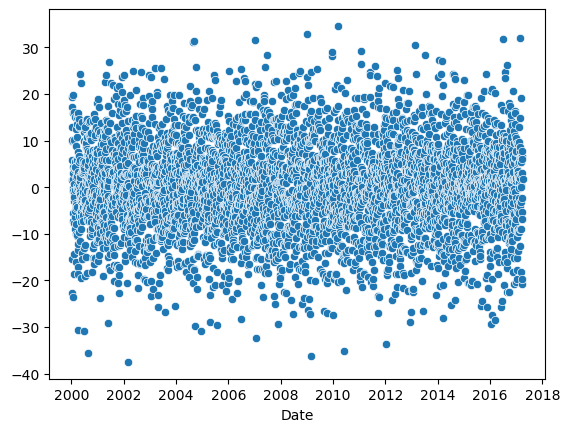

In [64]:
sns.scatterplot(model.resid)

<Axes: ylabel='Count'>

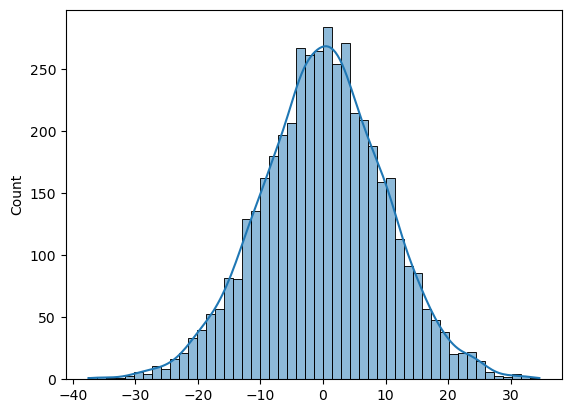

In [65]:
sns.histplot(model.resid, kde=True, bins=50)

Residuals are mostly normal, which means the model is learning the data well

# Part 2 - developing a trading strategy

Now that I dicovered the trends of the data, I make an assumption that today's signals are collected before the market close, meaning today's signals can be used to predict the closing price. We saw earlier that differenced signal4 had a high correlation with the differenced asset price, so I attempt to utilize the changes of signal4's value to generate a trading strategy. 

In [86]:
df = pd.read_csv('data.csv').set_index('Date')
df.index = pd.to_datetime(df.index)
df.head()

Asset      Signal1     Signal2     Signal3     Signal4  \
Date                                                                       
2000-01-03  4258.481700  4237.827494  393.780879 -337.933192  659.763906   
2000-01-04  4260.246443  4222.822224  378.585650 -364.449284  648.940384   
2000-01-05  4262.254628  4213.824762  389.955615 -391.594831  641.329710   
2000-01-06  4289.405332  4239.016108  406.660516 -333.249594  683.822313   
2000-01-07  4293.746629  4232.818801  403.366787 -320.479903  682.553985   

               Signal5      Signal6     Signal7     Signal8  
Date                                                         
2000-01-03 -752.865453  1034.127659 -950.257818  198.264577  
2000-01-04 -732.505856  1042.256957 -977.358249  211.206055  
2000-01-05 -728.611976  1063.217724 -951.518386  198.595598  
2000-01-06 -729.657222  1079.316062 -932.785850  181.822031  
2000-01-07 -713.180569  1087.226725 -941.674136  197.875560

My simple strategy is this: if the next value of Signal4 increases the moving average of Signal4 by a significant percentage, then I will buy. If the next value of Signal4 decreases the moving average of Signal4 by a significant percentage, then I will sell. Otherwise, I will hold. This method involves tweaking the thresholds to obtain the maximum PnL by the end of the dataset.

In [116]:
trading_df = df[["Signal4", "Asset"]]
trading_df["Signal4_change"] = trading_df.Signal4.pct_change()
trading_df = trading_df.dropna()
trading_df.head()

/var/folders/yw/mc7qyqyn5cd788q903jfp8_w0000gn/T/ipykernel_2125/382145184.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trading_df["Signal4_change"] = trading_df.Signal4.pct_change()


Signal4        Asset  Signal4_change
Date                                               
2000-01-03  659.763906  4258.481700             NaN
2000-01-04  648.940384  4260.246443       -0.016405
2000-01-05  641.329710  4262.254628       -0.011728
2000-01-06  683.822313  4289.405332        0.066257
2000-01-07  682.553985  4293.746629       -0.001855

In [154]:
buy_threshold = 0.08 # if signal4_change greater than this, then buy
sell_threshold = -0.08 # if signal4_change less than this, sell

signals = []
position = 0 # 0 is hold, 1 is buy, -1 is sell
trading_df["Buy"] = np.nan
trading_df["Sell"] = np.nan
for i in range(len(trading_df)):
    row = trading_df.iloc[i] 
    if row["Signal4_change"] >= buy_threshold:
        if position == 1:
            signals.append(0)
        else:
            signals.append(1)
            trading_df.iloc[i, trading_df.columns.get_loc("Buy")] = trading_df.iloc[i, trading_df.columns.get_loc("Asset")]
            position = 1
    elif row["Signal4_change"] <= sell_threshold:
        if position == -1:
            signals.append(0)
        else:
            signals.append(-1)
            position = -1
            trading_df.iloc[i, trading_df.columns.get_loc("Sell")] = trading_df.iloc[i, trading_df.columns.get_loc("Asset")]
    else:
        signals.append(0)

trading_df["Signals"] = signals

/var/folders/yw/mc7qyqyn5cd788q903jfp8_w0000gn/T/ipykernel_2125/768593692.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trading_df["Buy"] = np.nan
/var/folders/yw/mc7qyqyn5cd788q903jfp8_w0000gn/T/ipykernel_2125/768593692.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trading_df["Sell"] = np.nan
/var/folders/yw/mc7qyqyn5cd788q903jfp8_w0000gn/T/ipykernel_2125/768593692.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

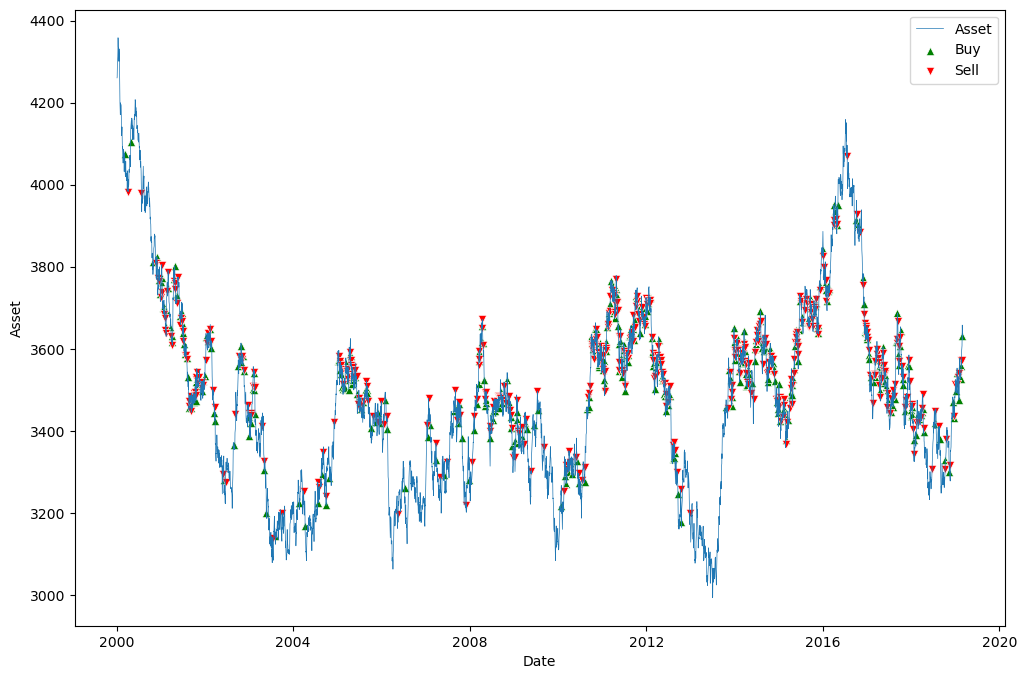

In [155]:
plt.figure(figsize=(12,8))
sns.lineplot(trading_df.Asset, label="Asset", linewidth=0.5)
sns.scatterplot(trading_df.Buy, label="Buy", marker="^", color="green")
sns.scatterplot(trading_df.Sell, label="Sell", marker="v", color="red")
plt.show();

In [157]:
trading_df.head()

Signal4        Asset  Signal4_change  Buy  Sell  Signals
Date                                                                   
2000-01-04  648.940384  4260.246443       -0.016405  NaN   NaN        0
2000-01-05  641.329710  4262.254628       -0.011728  NaN   NaN        0
2000-01-06  683.822313  4289.405332        0.066257  NaN   NaN        0
2000-01-07  682.553985  4293.746629       -0.001855  NaN   NaN        0
2000-01-10  681.237390  4311.970686       -0.001929  NaN   NaN        0

total return: 709.48


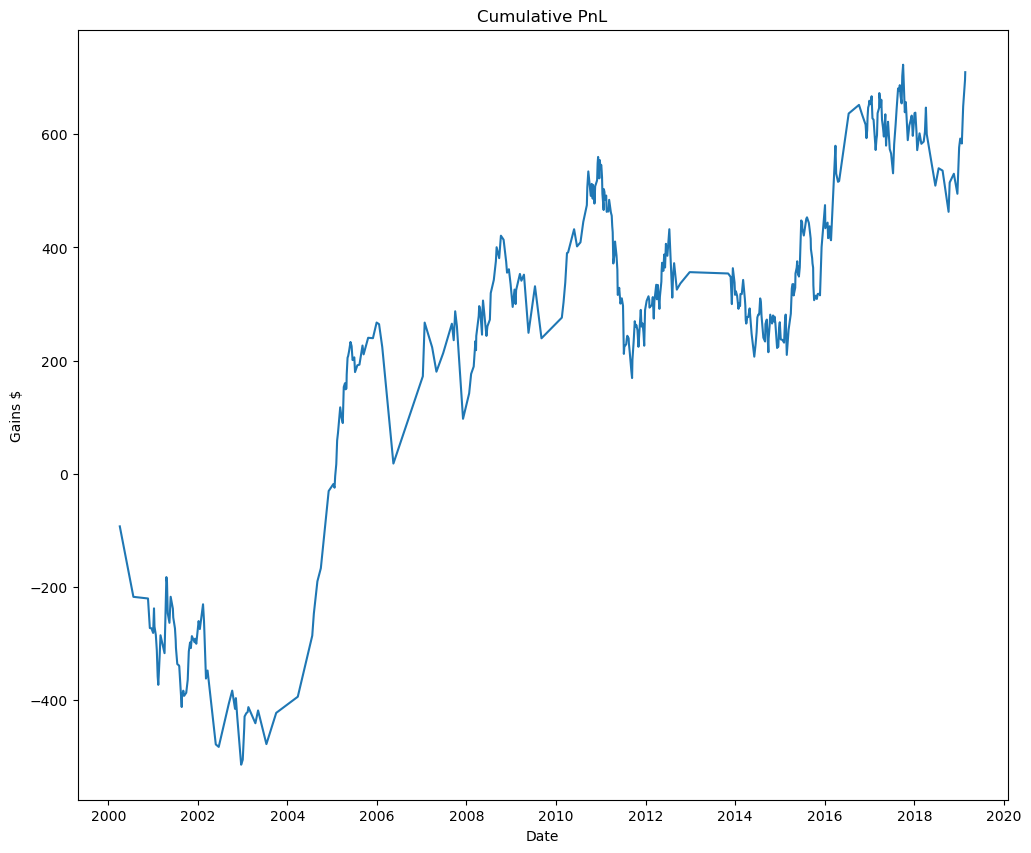

In [168]:
def calculate_pnl(data):
    buy_prices = data[data['Buy'].notna()]
    sell_prices = data[data['Sell'].notna()]
    if len(buy_prices) > len(sell_prices): # Means I bought one at end of timeseries without selling
        buy_prices = buy_prices[:-1]
    elif len(buy_prices) < len(sell_prices): # Means I sold stock before buying anything
        sell_prices = sell_prices[1:]
        
    total_return = (sell_prices['Sell'].values - buy_prices['Buy'].values).sum()
    print(f"total return: {total_return:.2f}")
    
    pnl = (sell_prices["Sell"].values - buy_prices["Buy"].values)
    cum_pnl = pd.Series(pnl.cumsum(), index=sell_prices.index)
    fig, ax = plt.subplots(figsize=(12,10))
    sns.lineplot(cum_pnl, ax=ax)
    ax.set_title("Cumulative PnL")
    ax.set_ylabel("Gains $")
    plt.show();
    
calculate_pnl(trading_df)

After some tweaking with the threshold values, I obtained a decent total return of 709.48$. However, we can improve this strategy by incorporating better predictive methods than simply relying on one signal. It is surprising that even using one signal was able to generate any positive return at all. However, I did notice that the trends of Signal4 seemed to mostly follow the trends of Asset when plotting the time series. Ideally, I would utilize an SARIMAX model to fit the data because of the autocorrelation within the data, and I would be able to pass in the highly correlated signals as exogenous variables. I believe an ARIMA(1, 1, 1) would fit the model well because I only needed to difference the data once, and the pacf plots indicated that there was significance at lag 1. However, the moving average model may need a higher q value based on the autocorrelation plot; to be sure, I would need to use a gridsearch method to find the best parameters.  

The reason I did not implement a more complex strategy was because I wanted to see whether Signal4 itself had predictive power. I did think about the possiblity that the reason Signal4 and Asset were so closely related together would be because Signal4 was a scaled lagged version of Asset, but the two variables were still strongly positively correlated after making the data stationary and removing autocorrelation. I also considered using my original OLS model, but the data itself was fitted on differenced data, meaning the model would have a look-ahead bias when asked to predict the next day's asset price. Using a single signal was the simplest method, and allowed me to see whether Signal4 had some predictive power. 